In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "loan-prediction-analytics-vidhya"

First Let us load the data

In [2]:
train_data <- read_csv("../input/loan-prediction-analytics-vidhya/train_ctrUa4K.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Loan_ID = col_character(),
  Gender = col_character(),
  Married = col_character(),
  Dependents = col_character(),
  Education = col_character(),
  Self_Employed = col_character(),
  ApplicantIncome = col_double(),
  CoapplicantIncome = col_double(),
  LoanAmount = col_double(),
  Loan_Amount_Term = col_double(),
  Credit_History = col_double(),
  Property_Area = col_character(),
  Loan_Status = col_character()
)




Let’s see the structure of the imported data

In [3]:
str(train_data)

spec_tbl_df [614 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Loan_ID          : chr [1:614] "LP001002" "LP001003" "LP001005" "LP001006" ...
 $ Gender           : chr [1:614] "Male" "Male" "Male" "Male" ...
 $ Married          : chr [1:614] "No" "Yes" "Yes" "Yes" ...
 $ Dependents       : chr [1:614] "0" "1" "0" "0" ...
 $ Education        : chr [1:614] "Graduate" "Graduate" "Graduate" "Not Graduate" ...
 $ Self_Employed    : chr [1:614] "No" "No" "Yes" "No" ...
 $ ApplicantIncome  : num [1:614] 5849 4583 3000 2583 6000 ...
 $ CoapplicantIncome: num [1:614] 0 1508 0 2358 0 ...
 $ LoanAmount       : num [1:614] NA 128 66 120 141 267 95 158 168 349 ...
 $ Loan_Amount_Term : num [1:614] 360 360 360 360 360 360 360 360 360 360 ...
 $ Credit_History   : num [1:614] 1 1 1 1 1 1 1 0 1 1 ...
 $ Property_Area    : chr [1:614] "Urban" "Rural" "Urban" "Urban" ...
 $ Loan_Status      : chr [1:614] "Y" "N" "Y" "Y" ...
 - attr(*, "spec")=
  .. cols(
  ..   Loan_ID = col_character(),
  ..   Gende

Observations:

1. There are 614 rows of data with 13 columns
2. Loan_status is the output variable
3. There are both categorical and numeric variables


In [4]:
train_data <- train_data %>% mutate(
  Gender = factor(Gender),
  Married  = factor(Married),
  Education   = factor(Education),
  Self_Employed  = factor(Self_Employed),
  Credit_History   = factor(Credit_History),
  Property_Area   = factor(Property_Area),
  Loan_Status    = factor(Loan_Status)  
)

In [5]:
train_data <- train_data %>% mutate(
  Dependents = as.numeric(Dependents)
)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


Lets go for an overview

In [6]:
summary(train_data)

   Loan_ID             Gender    Married      Dependents            Education  
 Length:614         Female:112   No  :213   Min.   :0.0000   Graduate    :480  
 Class :character   Male  :489   Yes :398   1st Qu.:0.0000   Not Graduate:134  
 Mode  :character   NA's  : 13   NA's:  3   Median :0.0000                     
                                            Mean   :0.5547                     
                                            3rd Qu.:1.0000                     
                                            Max.   :2.0000                     
                                            NA's   :66                         
 Self_Employed ApplicantIncome CoapplicantIncome   LoanAmount   
 No  :500      Min.   :  150   Min.   :    0     Min.   :  9.0  
 Yes : 82      1st Qu.: 2878   1st Qu.:    0     1st Qu.:100.0  
 NA's: 32      Median : 3812   Median : 1188     Median :128.0  
               Mean   : 5403   Mean   : 1621     Mean   :146.4  
               3rd Qu.: 5795   3rd 

The summary function gives us an overview over the different feature columns, their type (character, numerical) and basic distribution information. We also see that the features Gender, Married,Dependents, Self Employed, LoanAmount, Loan_Amount_Term and Credit_history have missing values

In [7]:
glimpse(train_data)

Rows: 614
Columns: 13
$ Loan_ID           <chr> "LP001002", "LP001003", "LP001005", "LP001006", "LP…
$ Gender            <fct> Male, Male, Male, Male, Male, Male, Male, Male, Mal…
$ Married           <fct> No, Yes, Yes, Yes, No, Yes, Yes, Yes, Yes, Yes, Yes…
$ Dependents        <dbl> 0, 1, 0, 0, 0, 2, 0, NA, 2, 1, 2, 2, 2, 0, 2, 0, 1,…
$ Education         <fct> Graduate, Graduate, Graduate, Not Graduate, Graduat…
$ Self_Employed     <fct> No, No, Yes, No, No, Yes, No, No, No, No, No, NA, N…
$ ApplicantIncome   <dbl> 5849, 4583, 3000, 2583, 6000, 5417, 2333, 3036, 400…
$ CoapplicantIncome <dbl> 0, 1508, 0, 2358, 0, 4196, 1516, 2504, 1526, 10968,…
$ LoanAmount        <dbl> NA, 128, 66, 120, 141, 267, 95, 158, 168, 349, 70, …
$ Loan_Amount_Term  <dbl> 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 3…
$ Credit_History    <fct> 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, NA,…
$ Property_Area     <fct> Urban, Rural, Urban, Urban, Urban, Urban, Urban, Se…
$ Loan_Status       <fct> Y, N

In [8]:
train_data %>%
  count(Loan_Status)

,Loan_Status,n
,<fct>,<int>
1,N,192
2,Y,422


As we can see, there are 422 cases where the loan was sanctioned compared to 192 where it was denied

In [9]:
missing.values <- train_data %>%
    gather(key = "key", value = "val") %>%
    mutate(is.missing = is.na(val)) %>%
    group_by(key, is.missing) %>%
    summarise(num.missing = n()) %>%
    filter(is.missing==T) %>%
    select(-is.missing) %>%
    arrange(desc(num.missing)) 

Warning message:
“attributes are not identical across measure variables;
they will be dropped”
`summarise()` has grouped output by 'key'. You can override using the `.groups` argument.



In [10]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

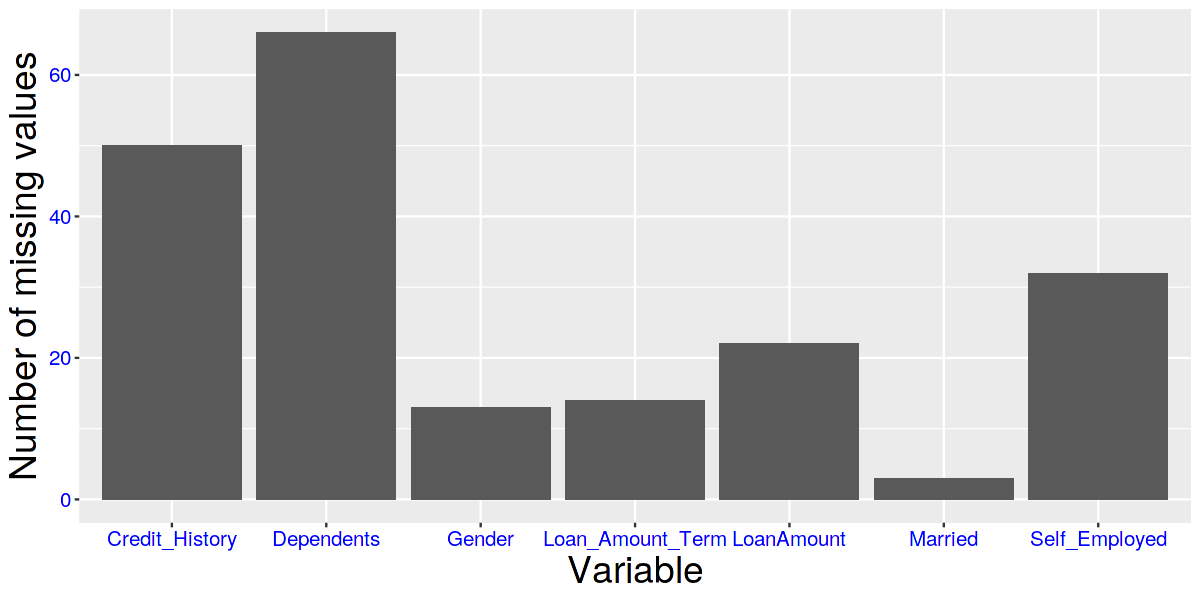

In [11]:
fig(10,5)
missing.values %>%
  ggplot() +
    geom_bar(aes(x=key, y=num.missing), stat = 'identity') +
    labs(x='Variable', y="Number of missing values") +
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

In [12]:
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

Warning message:
“Removed 22 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 14 rows containing non-finite values (stat_bin).”


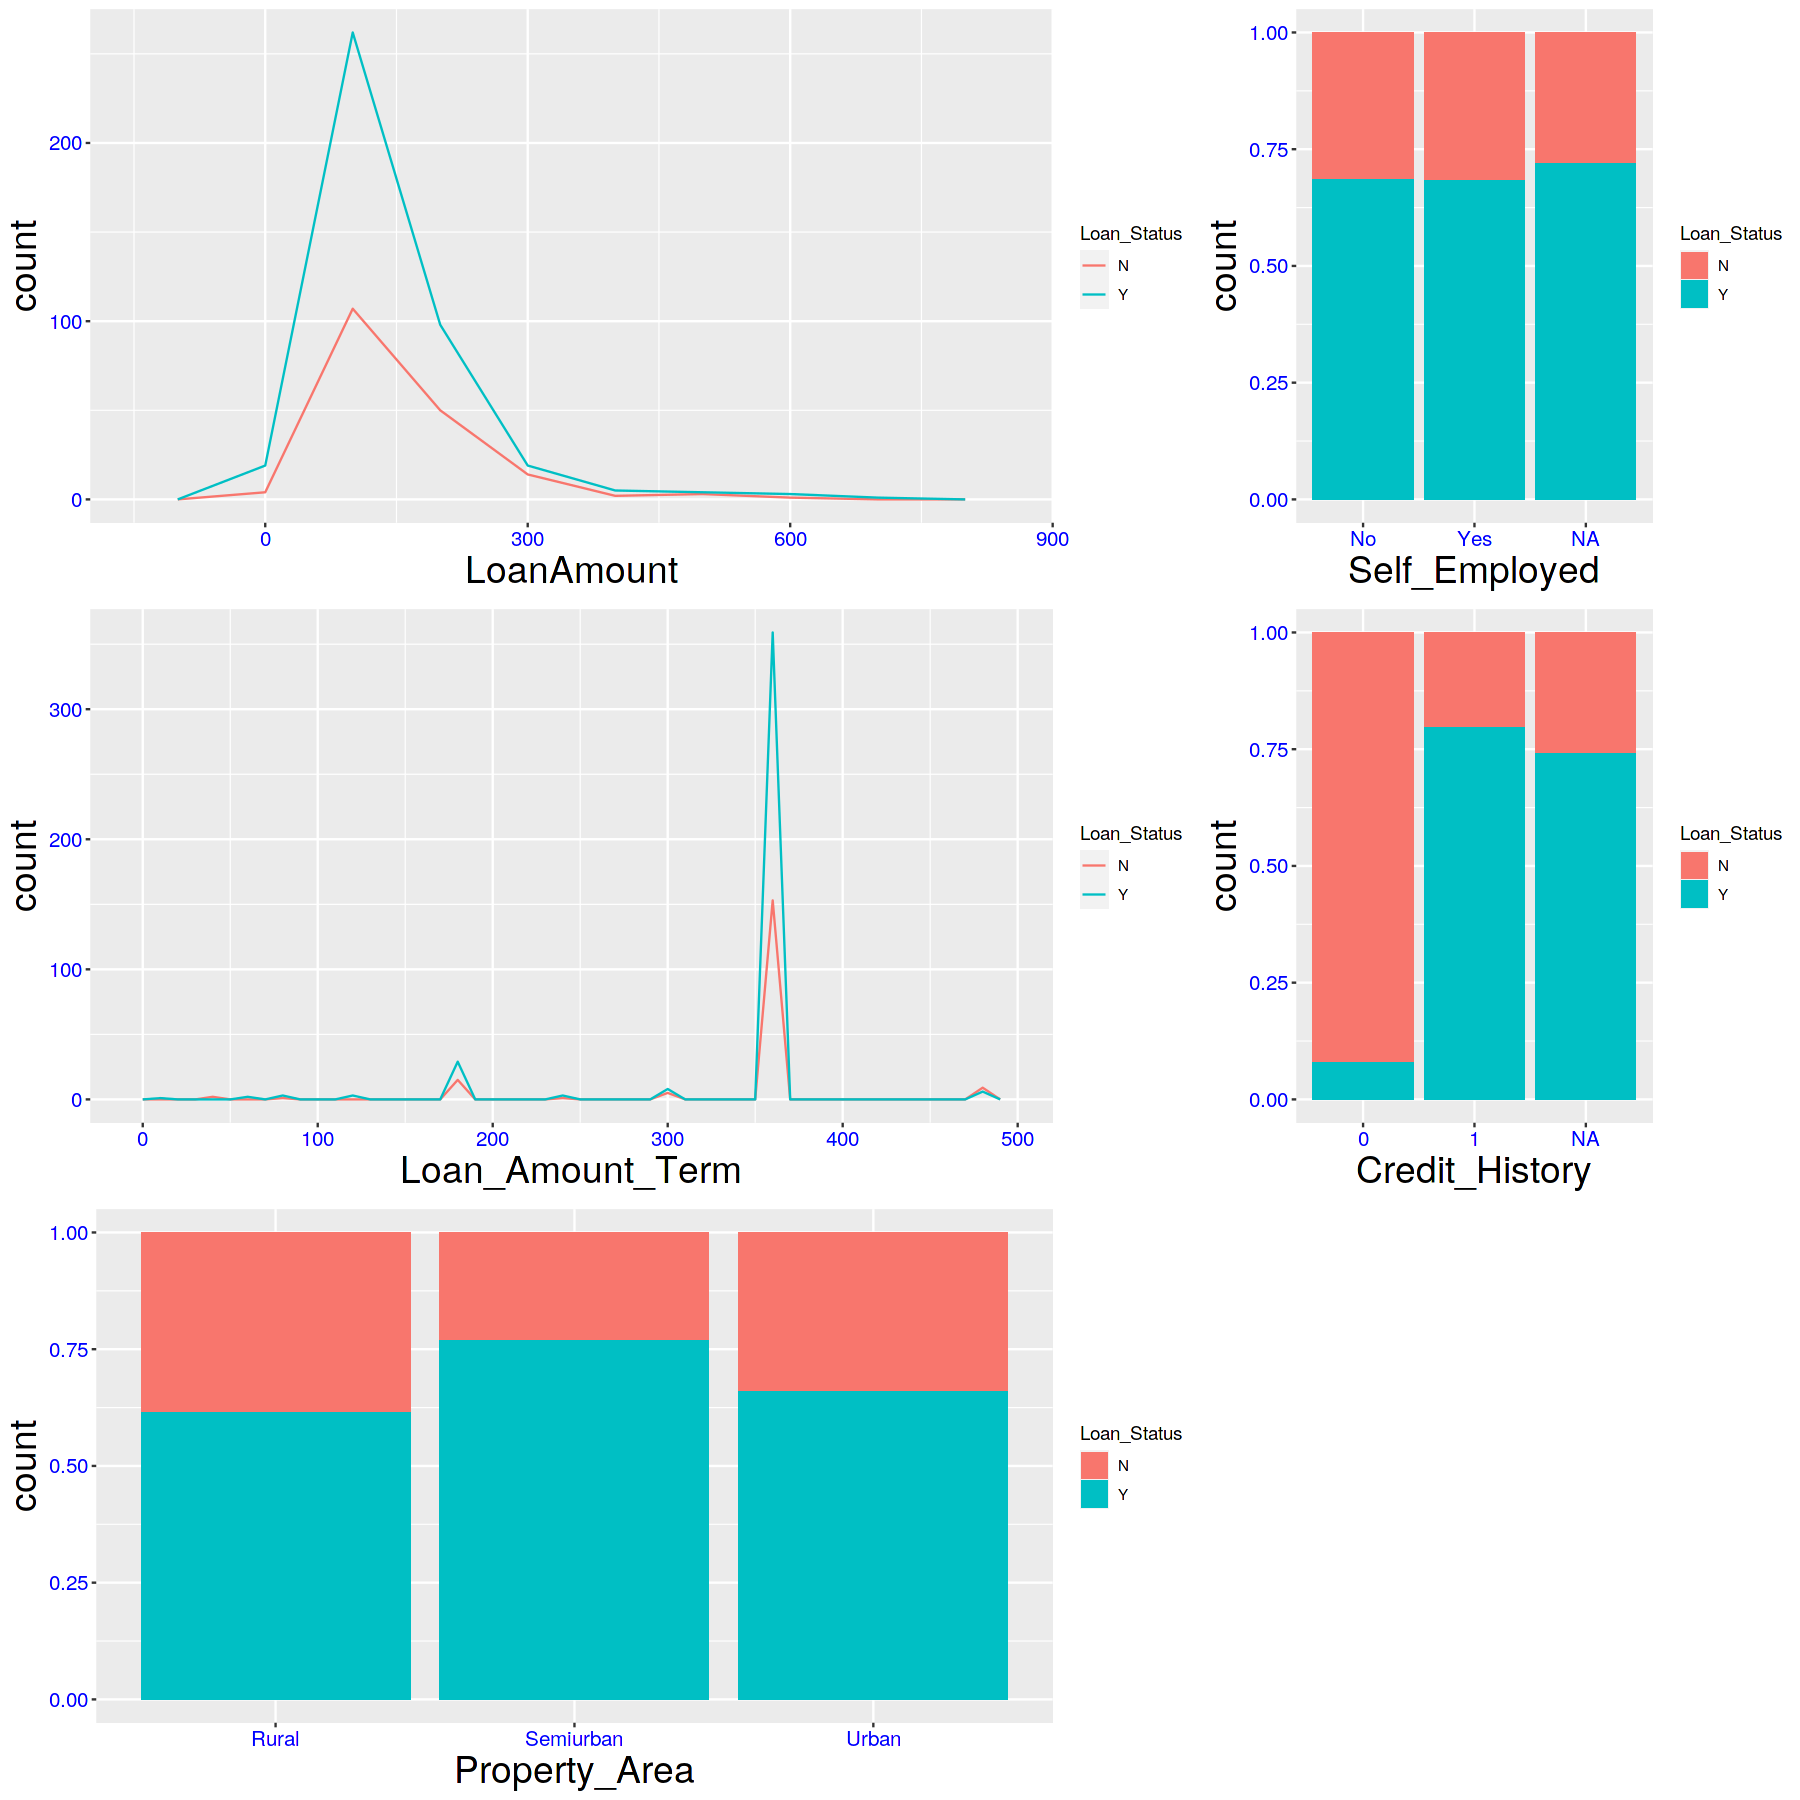

In [13]:
fig(15,15)

p_LoanAmount  = ggplot(train_data) +
geom_freqpoly(mapping = aes(x = LoanAmount  , color = Loan_Status), binwidth = 100) +
guides(fill=FALSE) +
theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

p_Self_Employed = ggplot(train_data, mapping = aes(x = Self_Employed, fill = Loan_Status)) +
geom_bar(stat='count', position='fill') +
labs(x = 'Self_Employed') +
scale_fill_discrete(name="Loan_Status") +
theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

p_Loan_Amount_Term = ggplot(train_data) +
geom_freqpoly(mapping = aes(x = Loan_Amount_Term  , color = Loan_Status), binwidth = 10) +
guides(fill=FALSE) +
theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

p_Credit_History  = ggplot(train_data, mapping = aes(x = Credit_History, fill = Loan_Status)) +
geom_bar(stat='count', position='fill') +
labs(x = 'Credit_History') +
scale_fill_discrete(name="Loan_Status") +
theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

p_Property_Area = ggplot(train_data, mapping = aes(x = Property_Area, fill = Loan_Status)) +
geom_bar(stat='count', position='fill') +
labs(x = 'Property_Area') +
scale_fill_discrete(name="Loan_Status") +
theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

layout <- matrix(c(1,1,2,3,3,4,5,5,6),3,3,byrow=TRUE)
multiplot( p_LoanAmount,p_Self_Employed,p_Loan_Amount_Term,p_Credit_History,p_Property_Area, layout=layout)

Observations:

1. If credit_history is 1 , then there is higher chance of getting loan
2. Slightly higher chance of getting loan for residents in Semi urban area 

Warning message:
“Removed 66 rows containing non-finite values (stat_bin).”


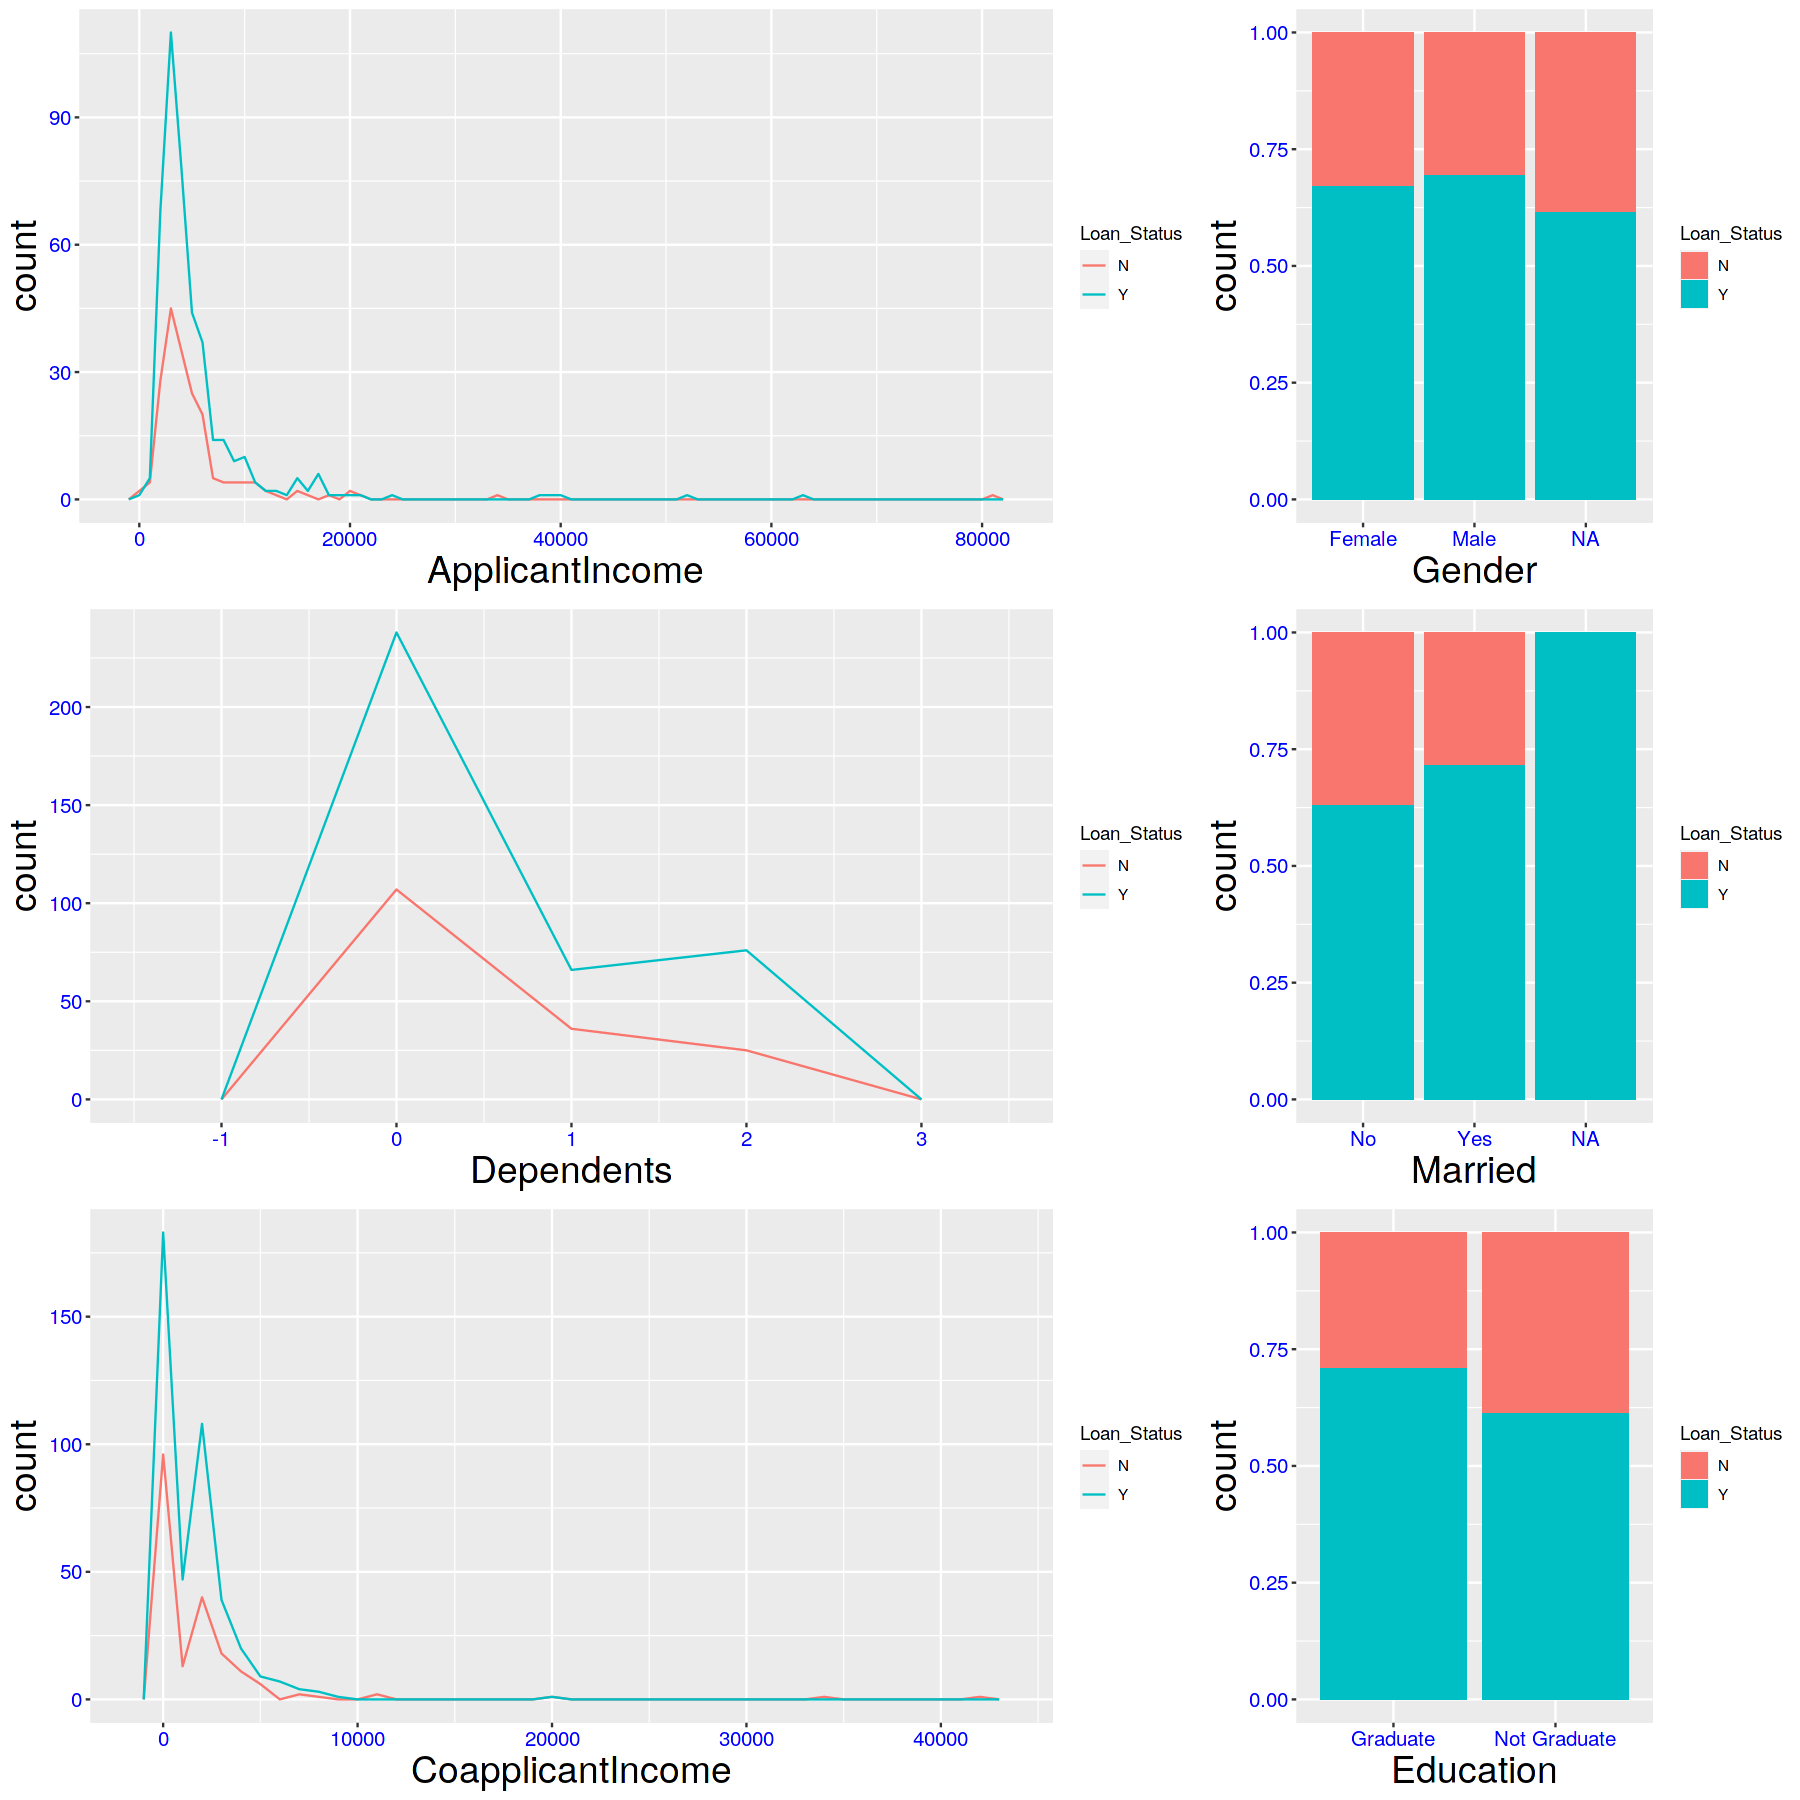

In [14]:
fig(15,15)

p_ApplicantIncome = ggplot(train_data) +
geom_freqpoly(mapping = aes(x = ApplicantIncome  , color = Loan_Status), binwidth = 1000) +
guides(fill=FALSE) +
theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

p_Gender  = ggplot(train_data, mapping = aes(x = Gender, fill = Loan_Status)) +
geom_bar(stat='count', position='fill') +
labs(x = 'Gender') +
scale_fill_discrete(name="Loan_Status") +
theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

p_Dependents = ggplot(train_data) +
geom_freqpoly(mapping = aes(x = Dependents  , color = Loan_Status), binwidth = 1) +
guides(fill=FALSE) +
theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

p_Married = ggplot(train_data, mapping = aes(x = Married, fill = Loan_Status)) +
geom_bar(stat='count', position='fill') +
labs(x = 'Married') +
scale_fill_discrete(name="Loan_Status") +
theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

p_CoapplicantIncome = ggplot(train_data) +
geom_freqpoly(mapping = aes(x = CoapplicantIncome  , color = Loan_Status), binwidth = 1000) +
guides(fill=FALSE) +
theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

p_Education = ggplot(train_data, mapping = aes(x = Education, fill = Loan_Status)) +
geom_bar(stat='count', position='fill') +
labs(x = 'Education') +
scale_fill_discrete(name="Loan_Status") +
theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))



layout <- matrix(c(1,1,2,3,3,4,5,5,6),3,3,byrow=TRUE)
multiplot(p_ApplicantIncome, p_Gender, p_Dependents, p_Married, p_CoapplicantIncome, p_Education, layout=layout)

Observations

1. Slightly higher trend  of getting loan for married people as well as for those who are graduate

corrplot 0.84 loaded



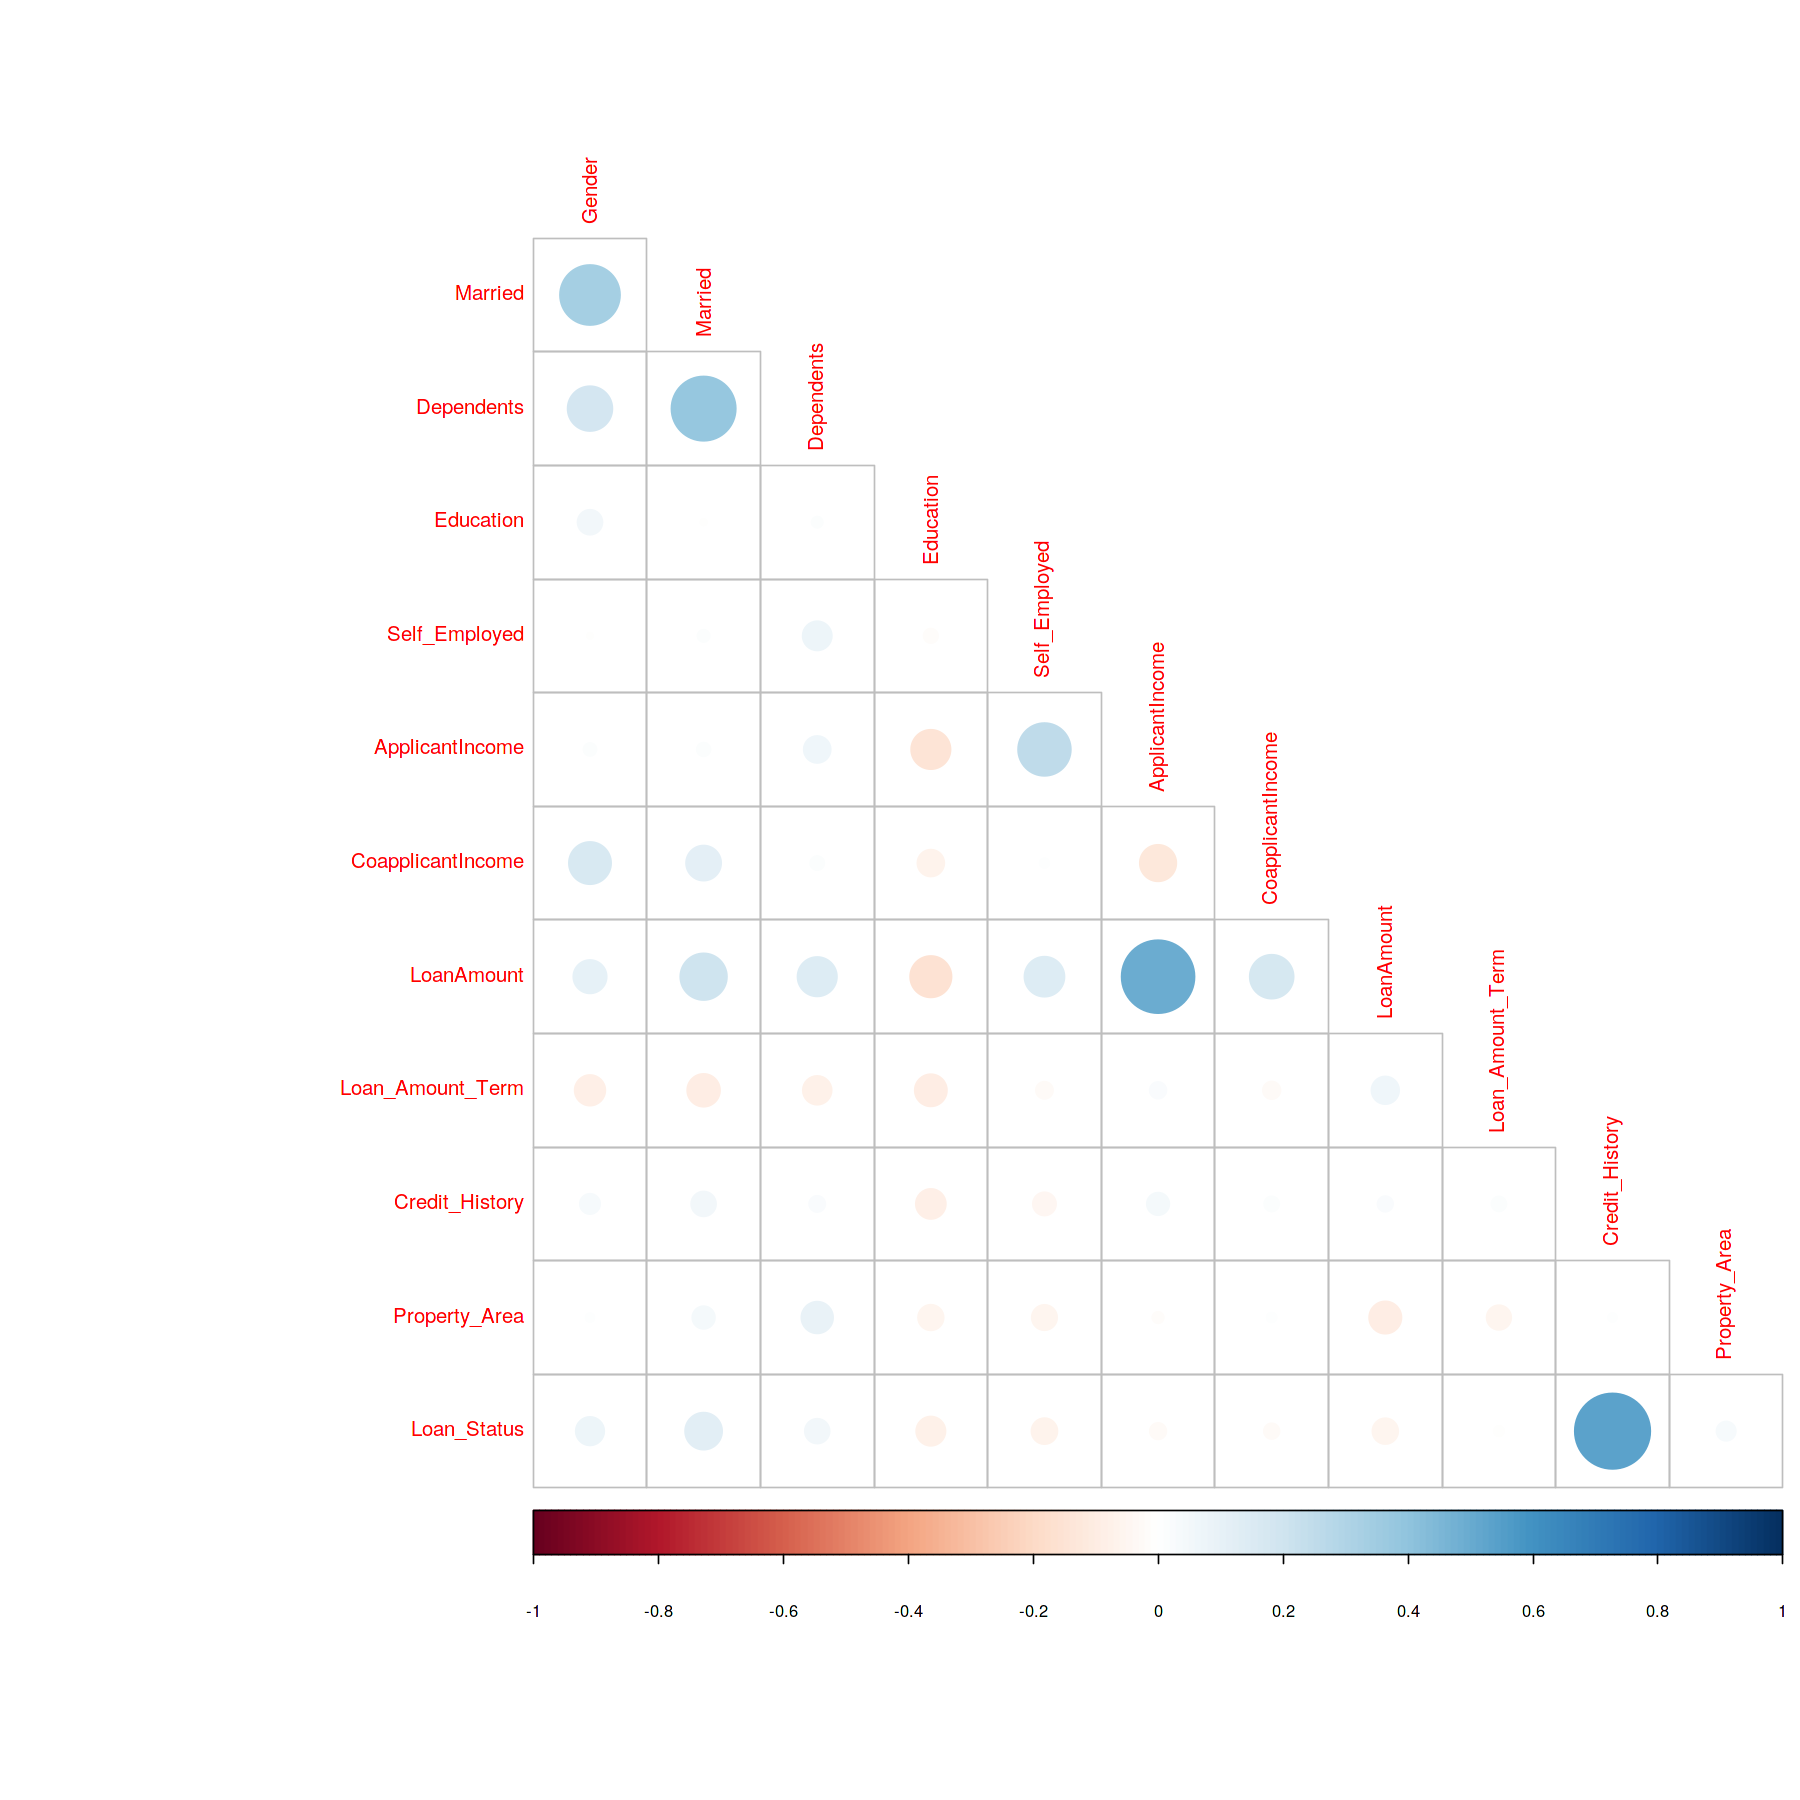

In [15]:

library(corrplot)
fig(15,15)

train_data %>%

  select(-Loan_ID ) %>%

  mutate(
         Gender = fct_recode(Gender,"0" = "Female","1" = "Male"),
         Married  = fct_recode(Married,"0" = "No","1" = "Yes"),
         Education   = fct_recode(Education,"0" = "Not Graduate","1" = "Graduate"),
         Self_Employed  = fct_recode(Self_Employed,"0" = "No","1" = "Yes"),
         Property_Area   = fct_recode(Property_Area,"1" = "Rural","2" = "Urban","3" = "Semiurban"),
         Loan_Status    = fct_recode(Loan_Status, "0" = "N","1" = "Y")  

        ) %>%

  mutate(Gender = as.integer(Gender),
         Married  = as.integer(Married),
         Education   = as.integer(Education),
         Self_Employed  = as.integer(Self_Employed),
         Credit_History   = as.integer(Credit_History),
         Property_Area   = as.integer(Property_Area),
         Loan_Status    = as.integer(Loan_Status))   %>%
     

  cor(use="complete.obs") %>%

  corrplot(type="lower", diag=FALSE)

Observation:

1. There is high positive correlation between loan status and credit history
2. There is high positive correlation between Applicant income and loan amount

 ### Continuous Vs Discrete variable

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 273 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”


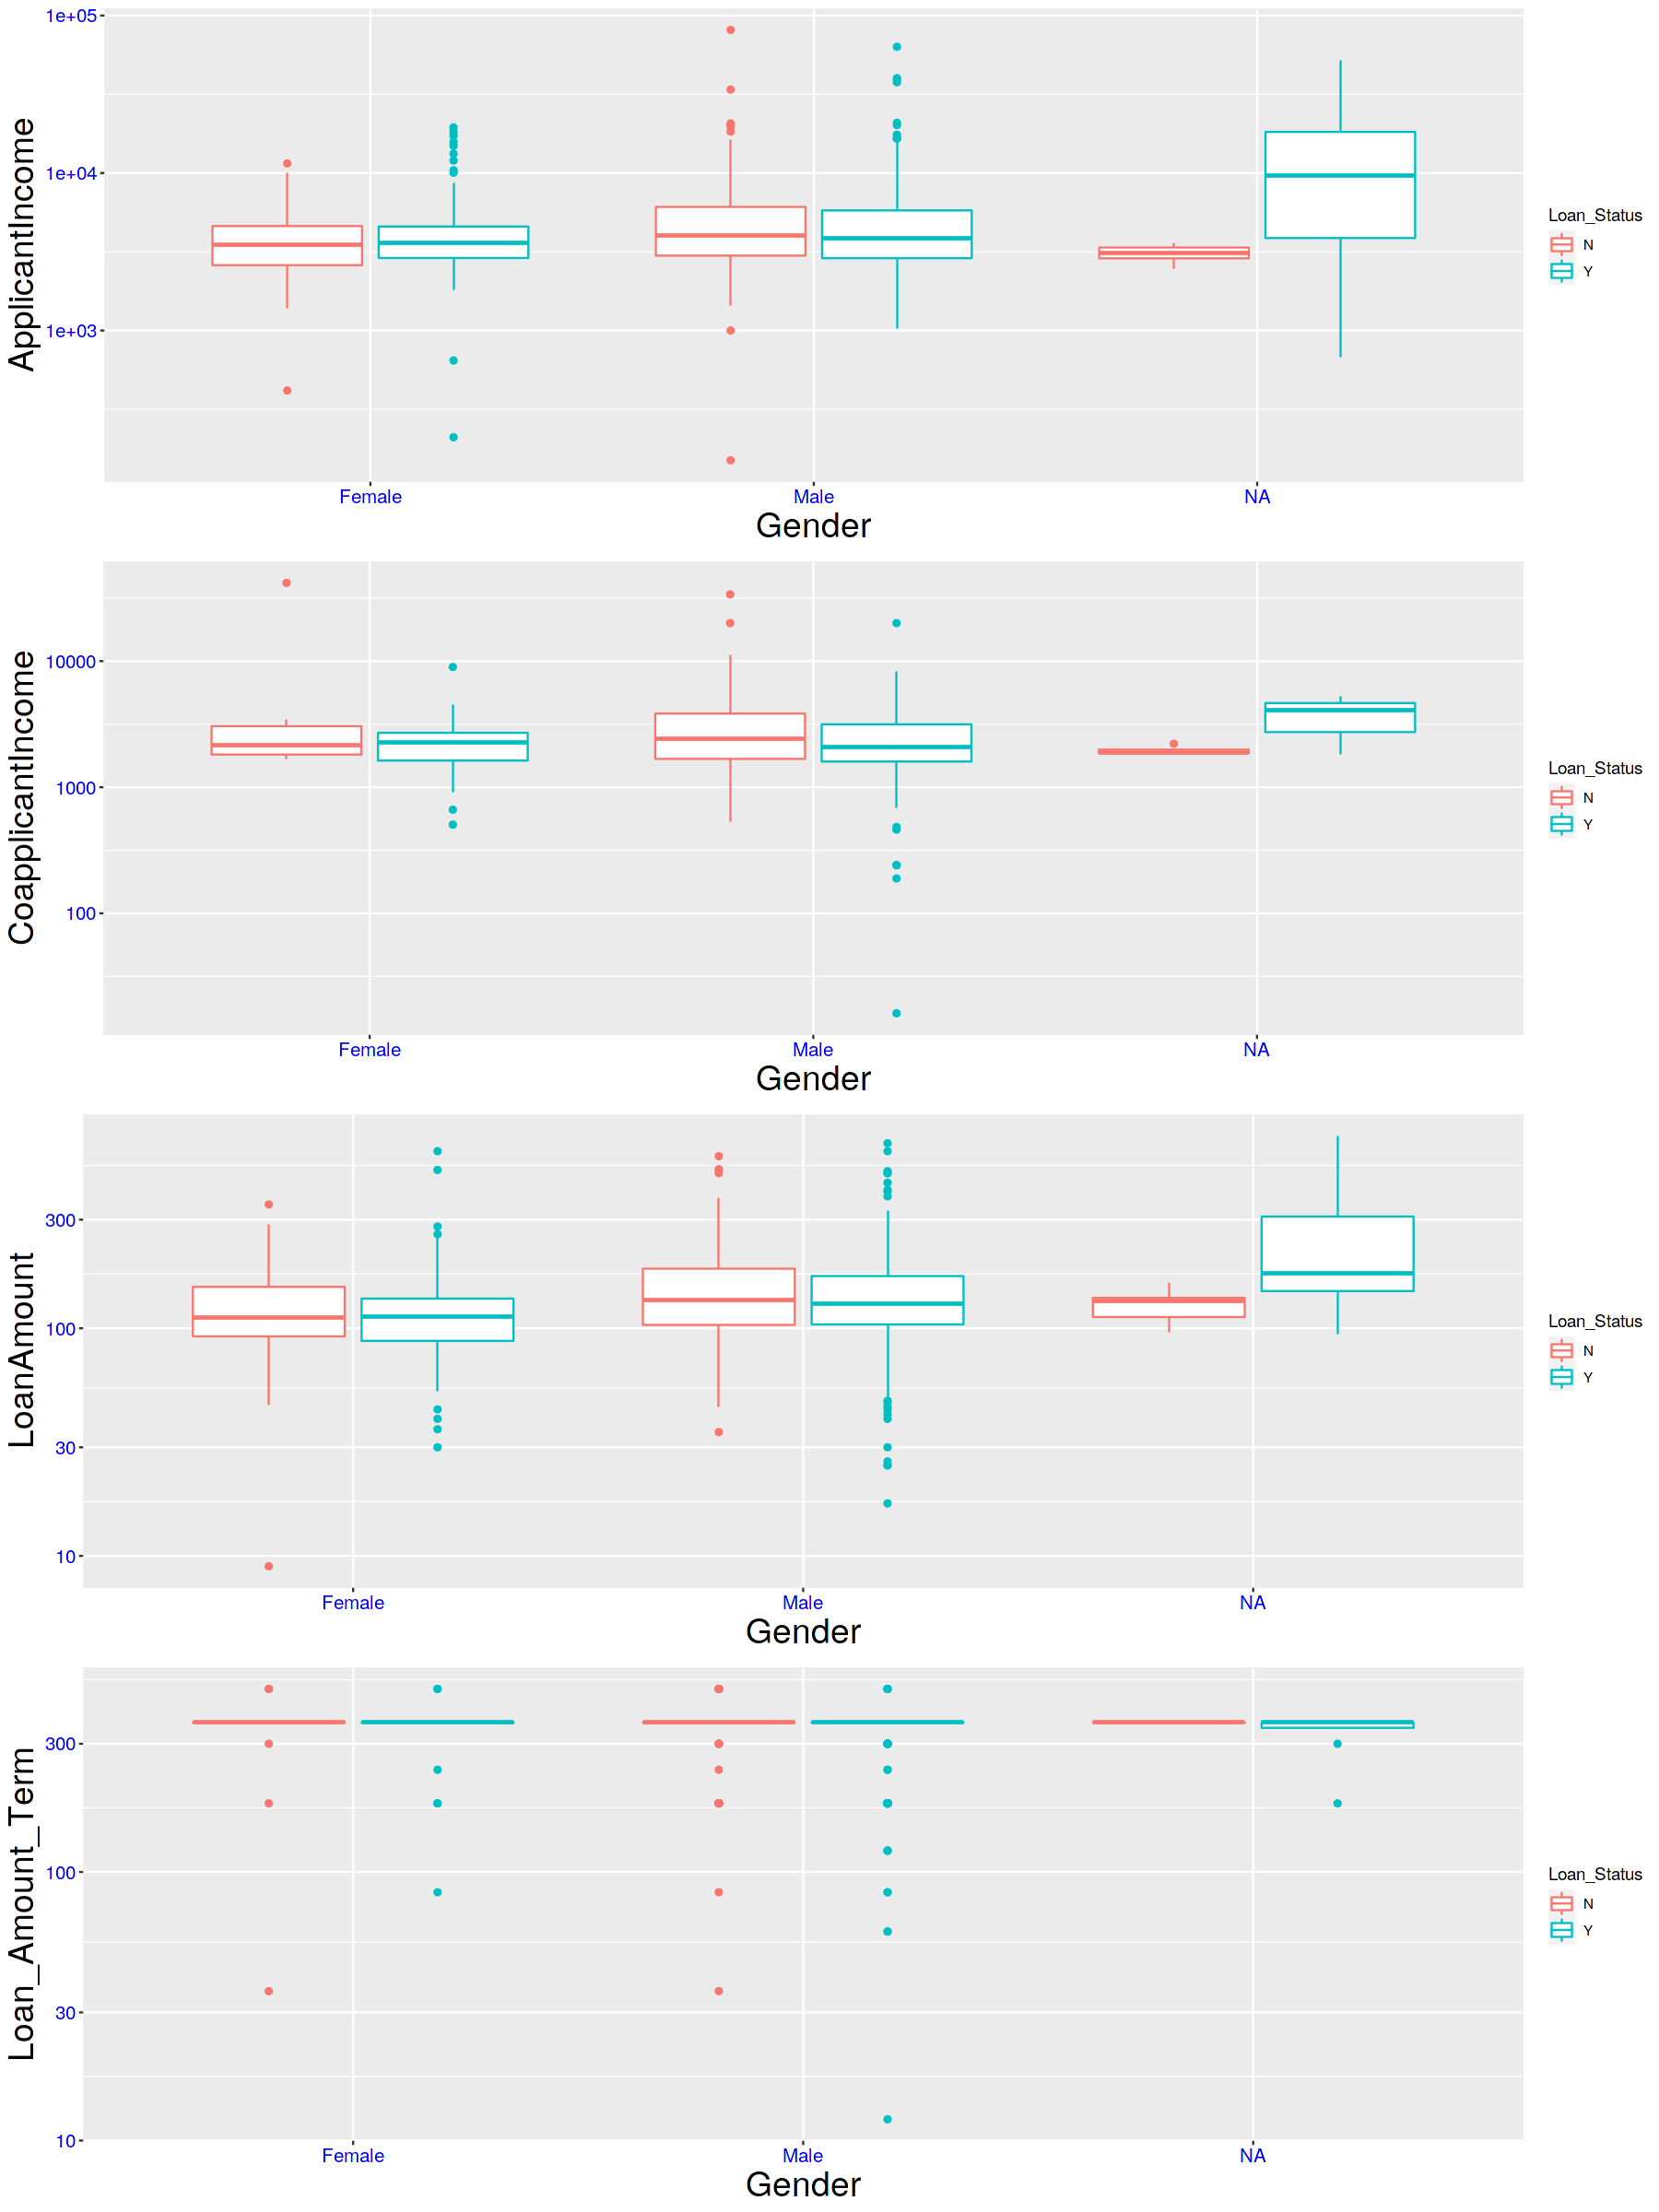

In [16]:
fig(15,20)

plot1 =   ggplot(train_data, aes(Gender, ApplicantIncome , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))


plot2 =   ggplot(train_data, aes(Gender, CoapplicantIncome , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

plot3 =   ggplot(train_data, aes(Gender, LoanAmount , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

plot4 =   ggplot(train_data, aes(Gender, Loan_Amount_Term , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

layout <- matrix(c(1,1,1,2,2,2,3,3,3,4,4,4),4,3,byrow=TRUE)
multiplot(plot1, plot2, plot3, plot4, layout=layout)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 273 rows containing non-finite values (stat_density).”
Warning message:
“Removed 22 rows containing non-finite values (stat_density).”
Warning message:
“Removed 14 rows containing non-finite values (stat_density).”


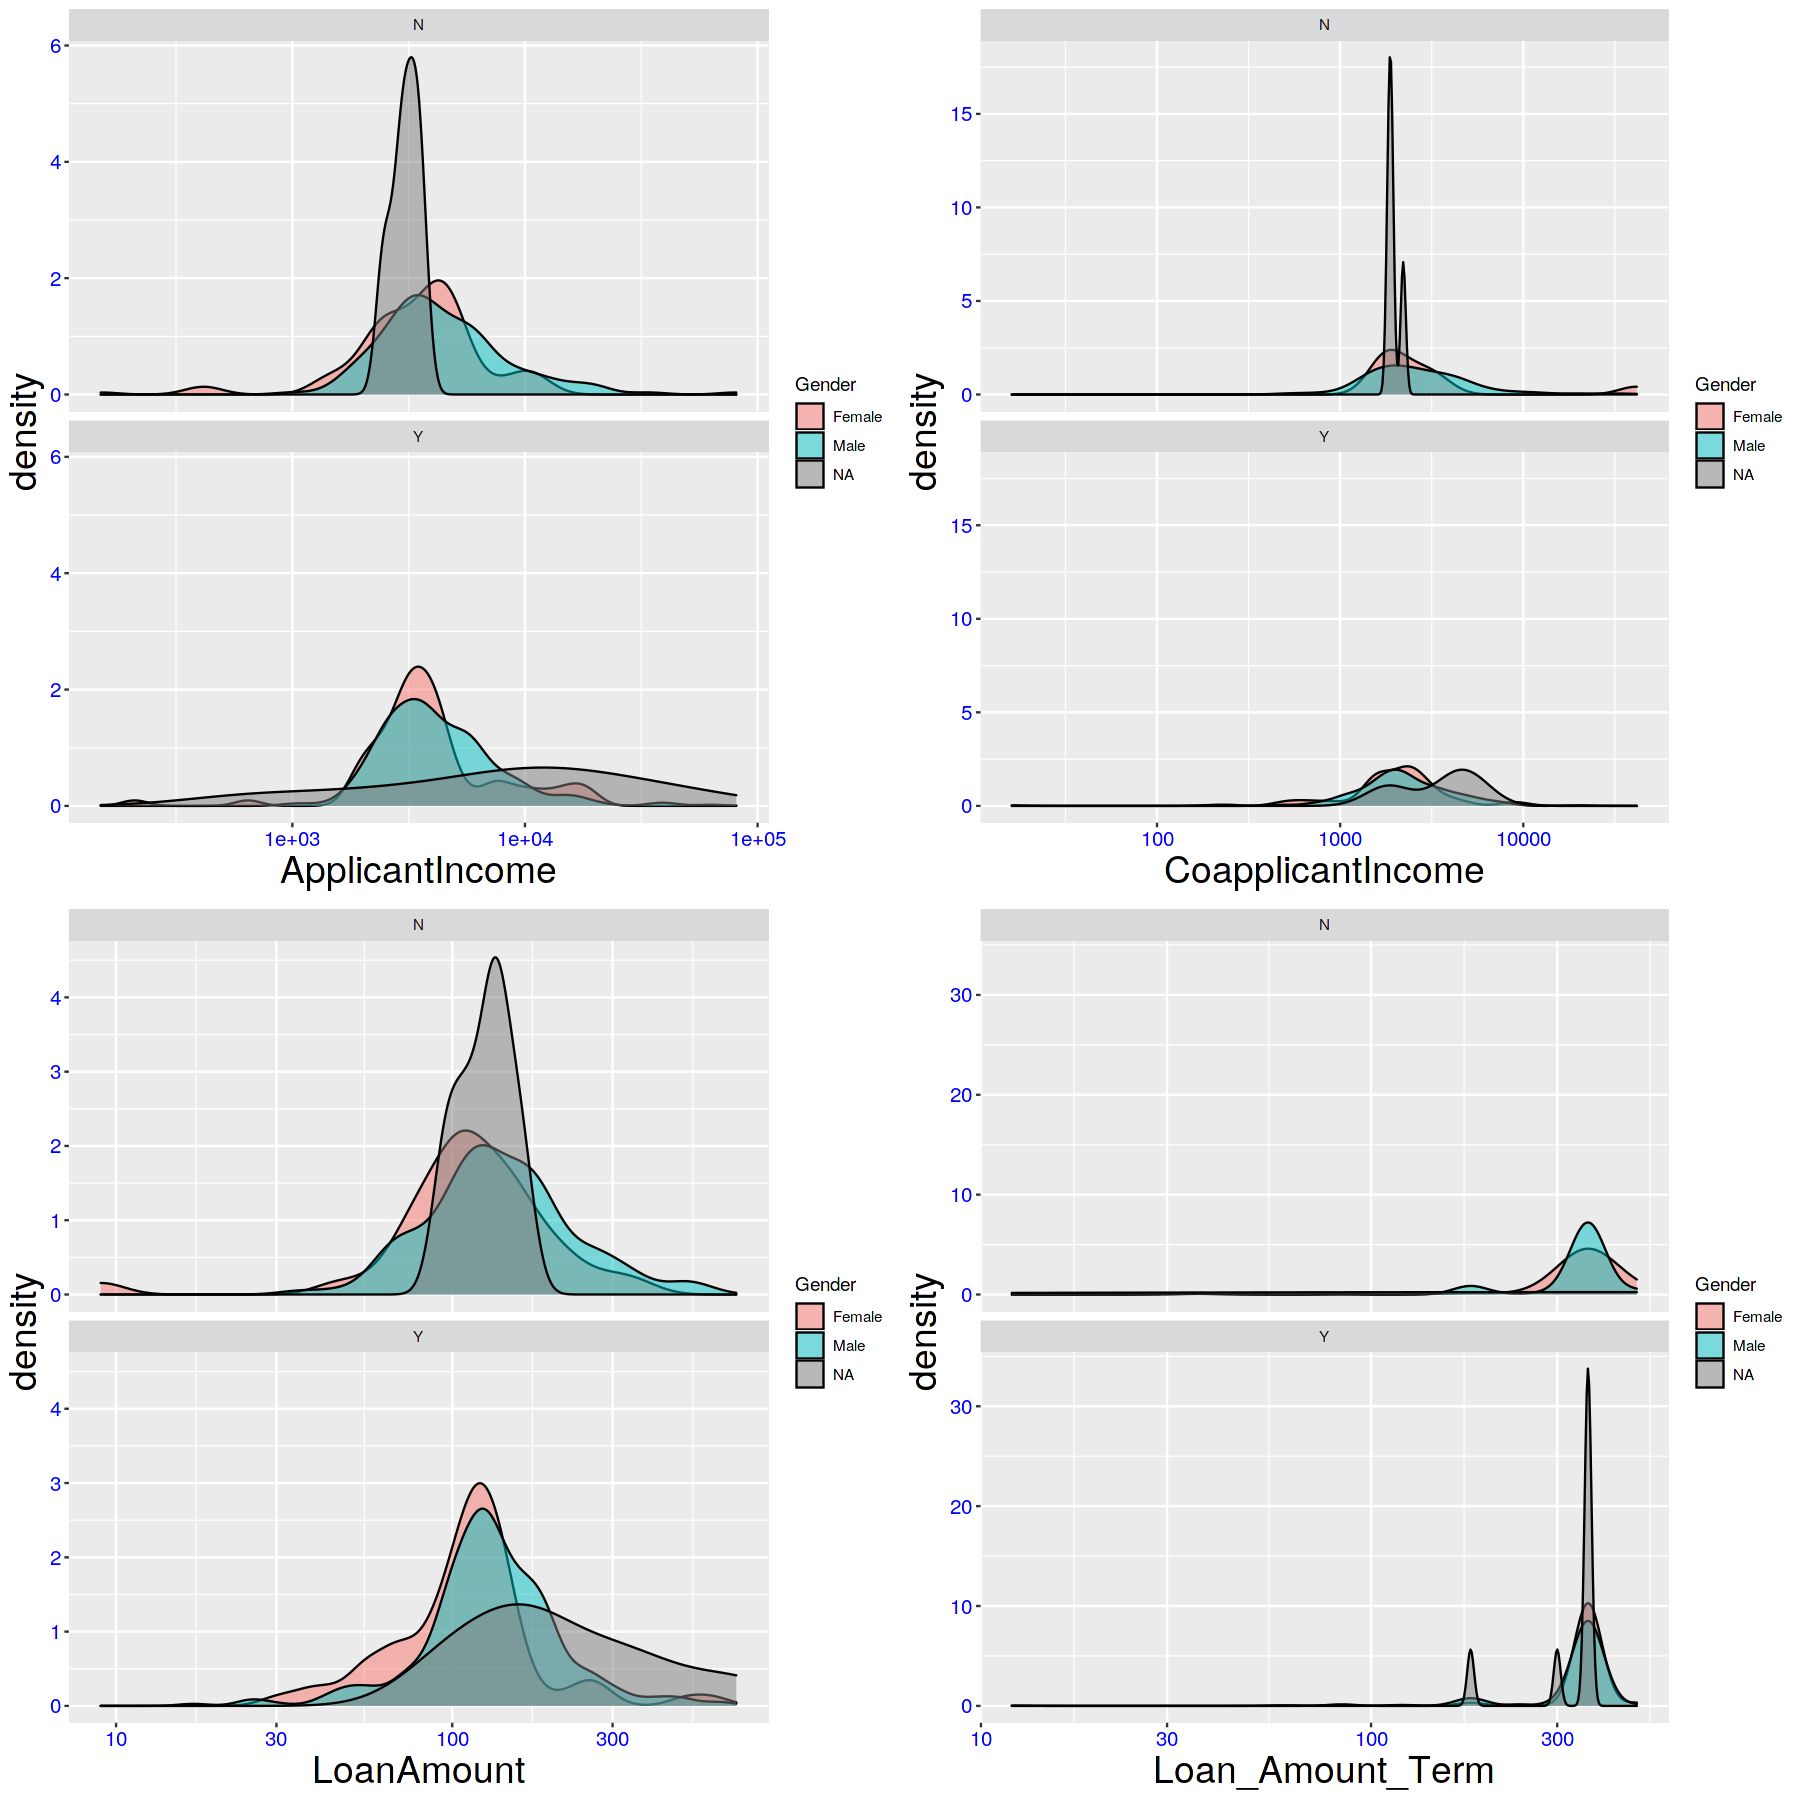

In [17]:
fig(15,15)

plot1 = train_data %>%

  ggplot(aes(ApplicantIncome, fill= Gender)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))



plot2 = train_data %>%

  ggplot(aes(CoapplicantIncome, fill= Gender)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))




plot3 = train_data %>%

  ggplot(aes(LoanAmount, fill= Gender)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))



plot4 = train_data %>%

  ggplot(aes(Loan_Amount_Term, fill= Gender)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

layout <- matrix(c(1,2,3,4),2,2,byrow=TRUE)
multiplot(plot1, plot2, plot3, plot4, layout=layout)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 273 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”


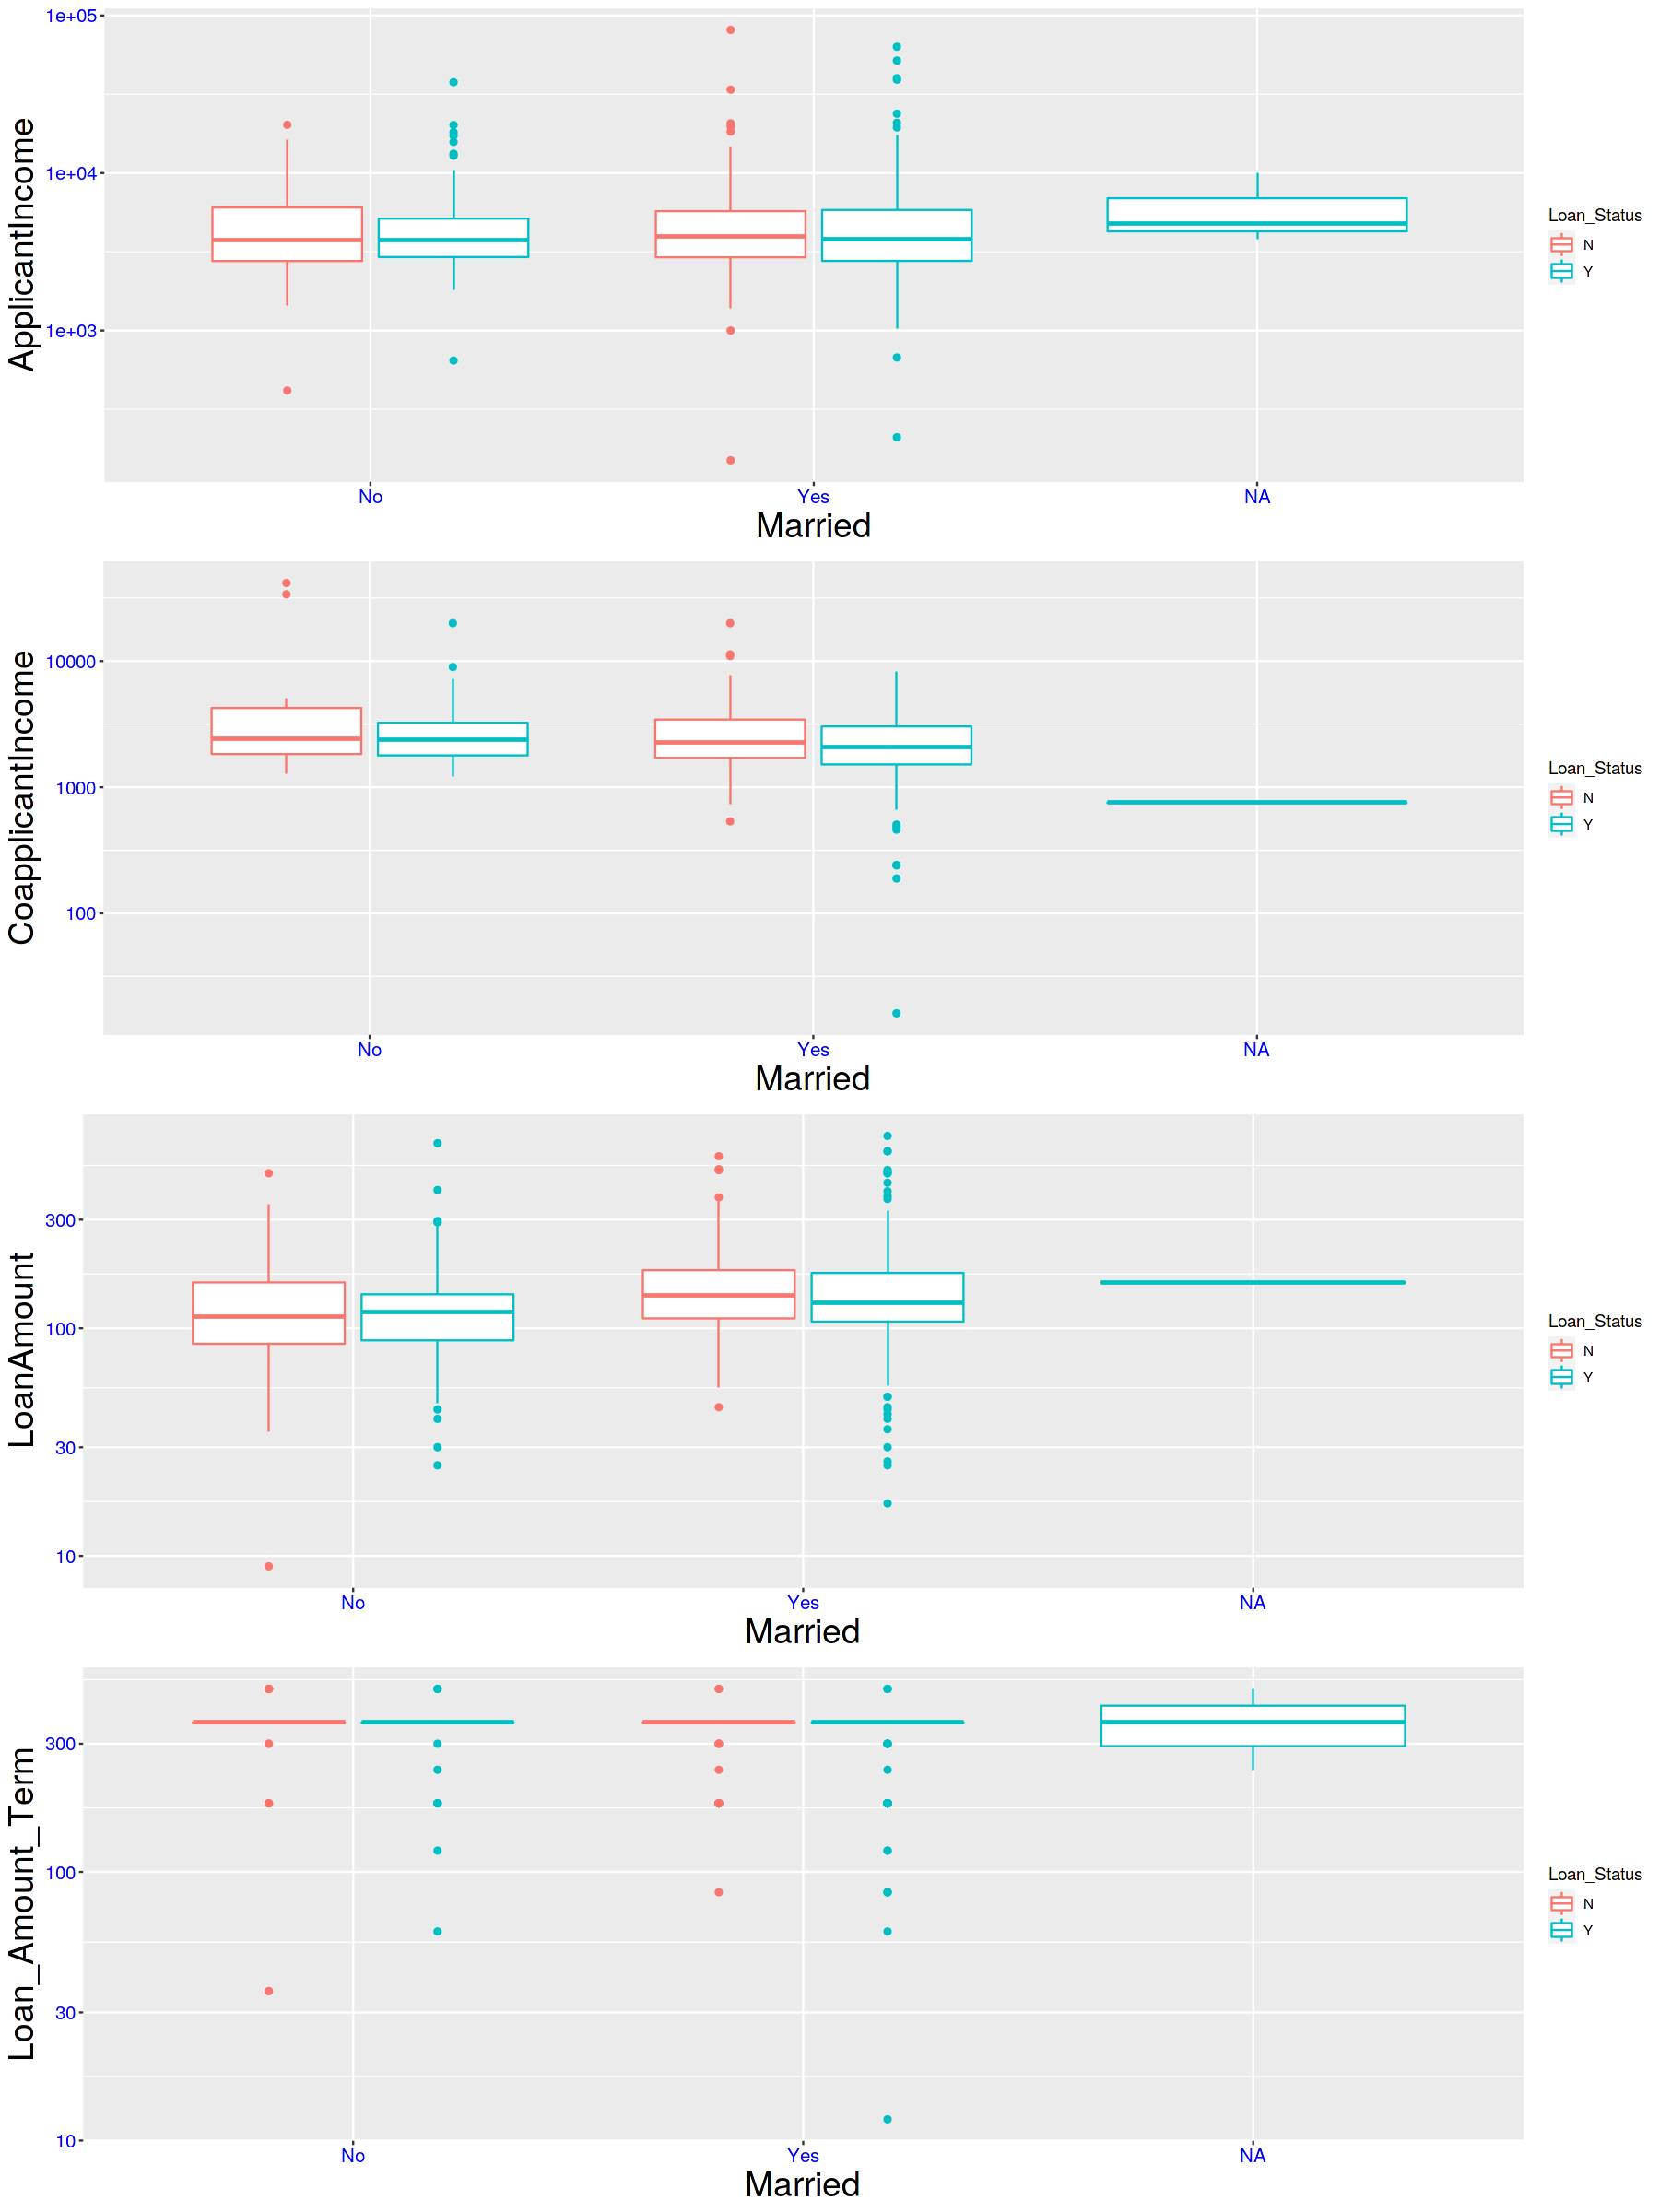

In [18]:
fig(15,20)

plot1 =   ggplot(train_data, aes(Married, ApplicantIncome , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))


plot2 =   ggplot(train_data, aes(Married, CoapplicantIncome , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

plot3 =   ggplot(train_data, aes(Married, LoanAmount , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

plot4 =   ggplot(train_data, aes(Married, Loan_Amount_Term , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

layout <- matrix(c(1,1,1,2,2,2,3,3,3,4,4,4),4,3,byrow=TRUE)
multiplot(plot1, plot2, plot3, plot4, layout=layout)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 273 rows containing non-finite values (stat_density).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Removed 22 rows containing non-finite values (stat_density).”
Warning message:
“Removed 14 rows containing non-finite values (stat_density).”


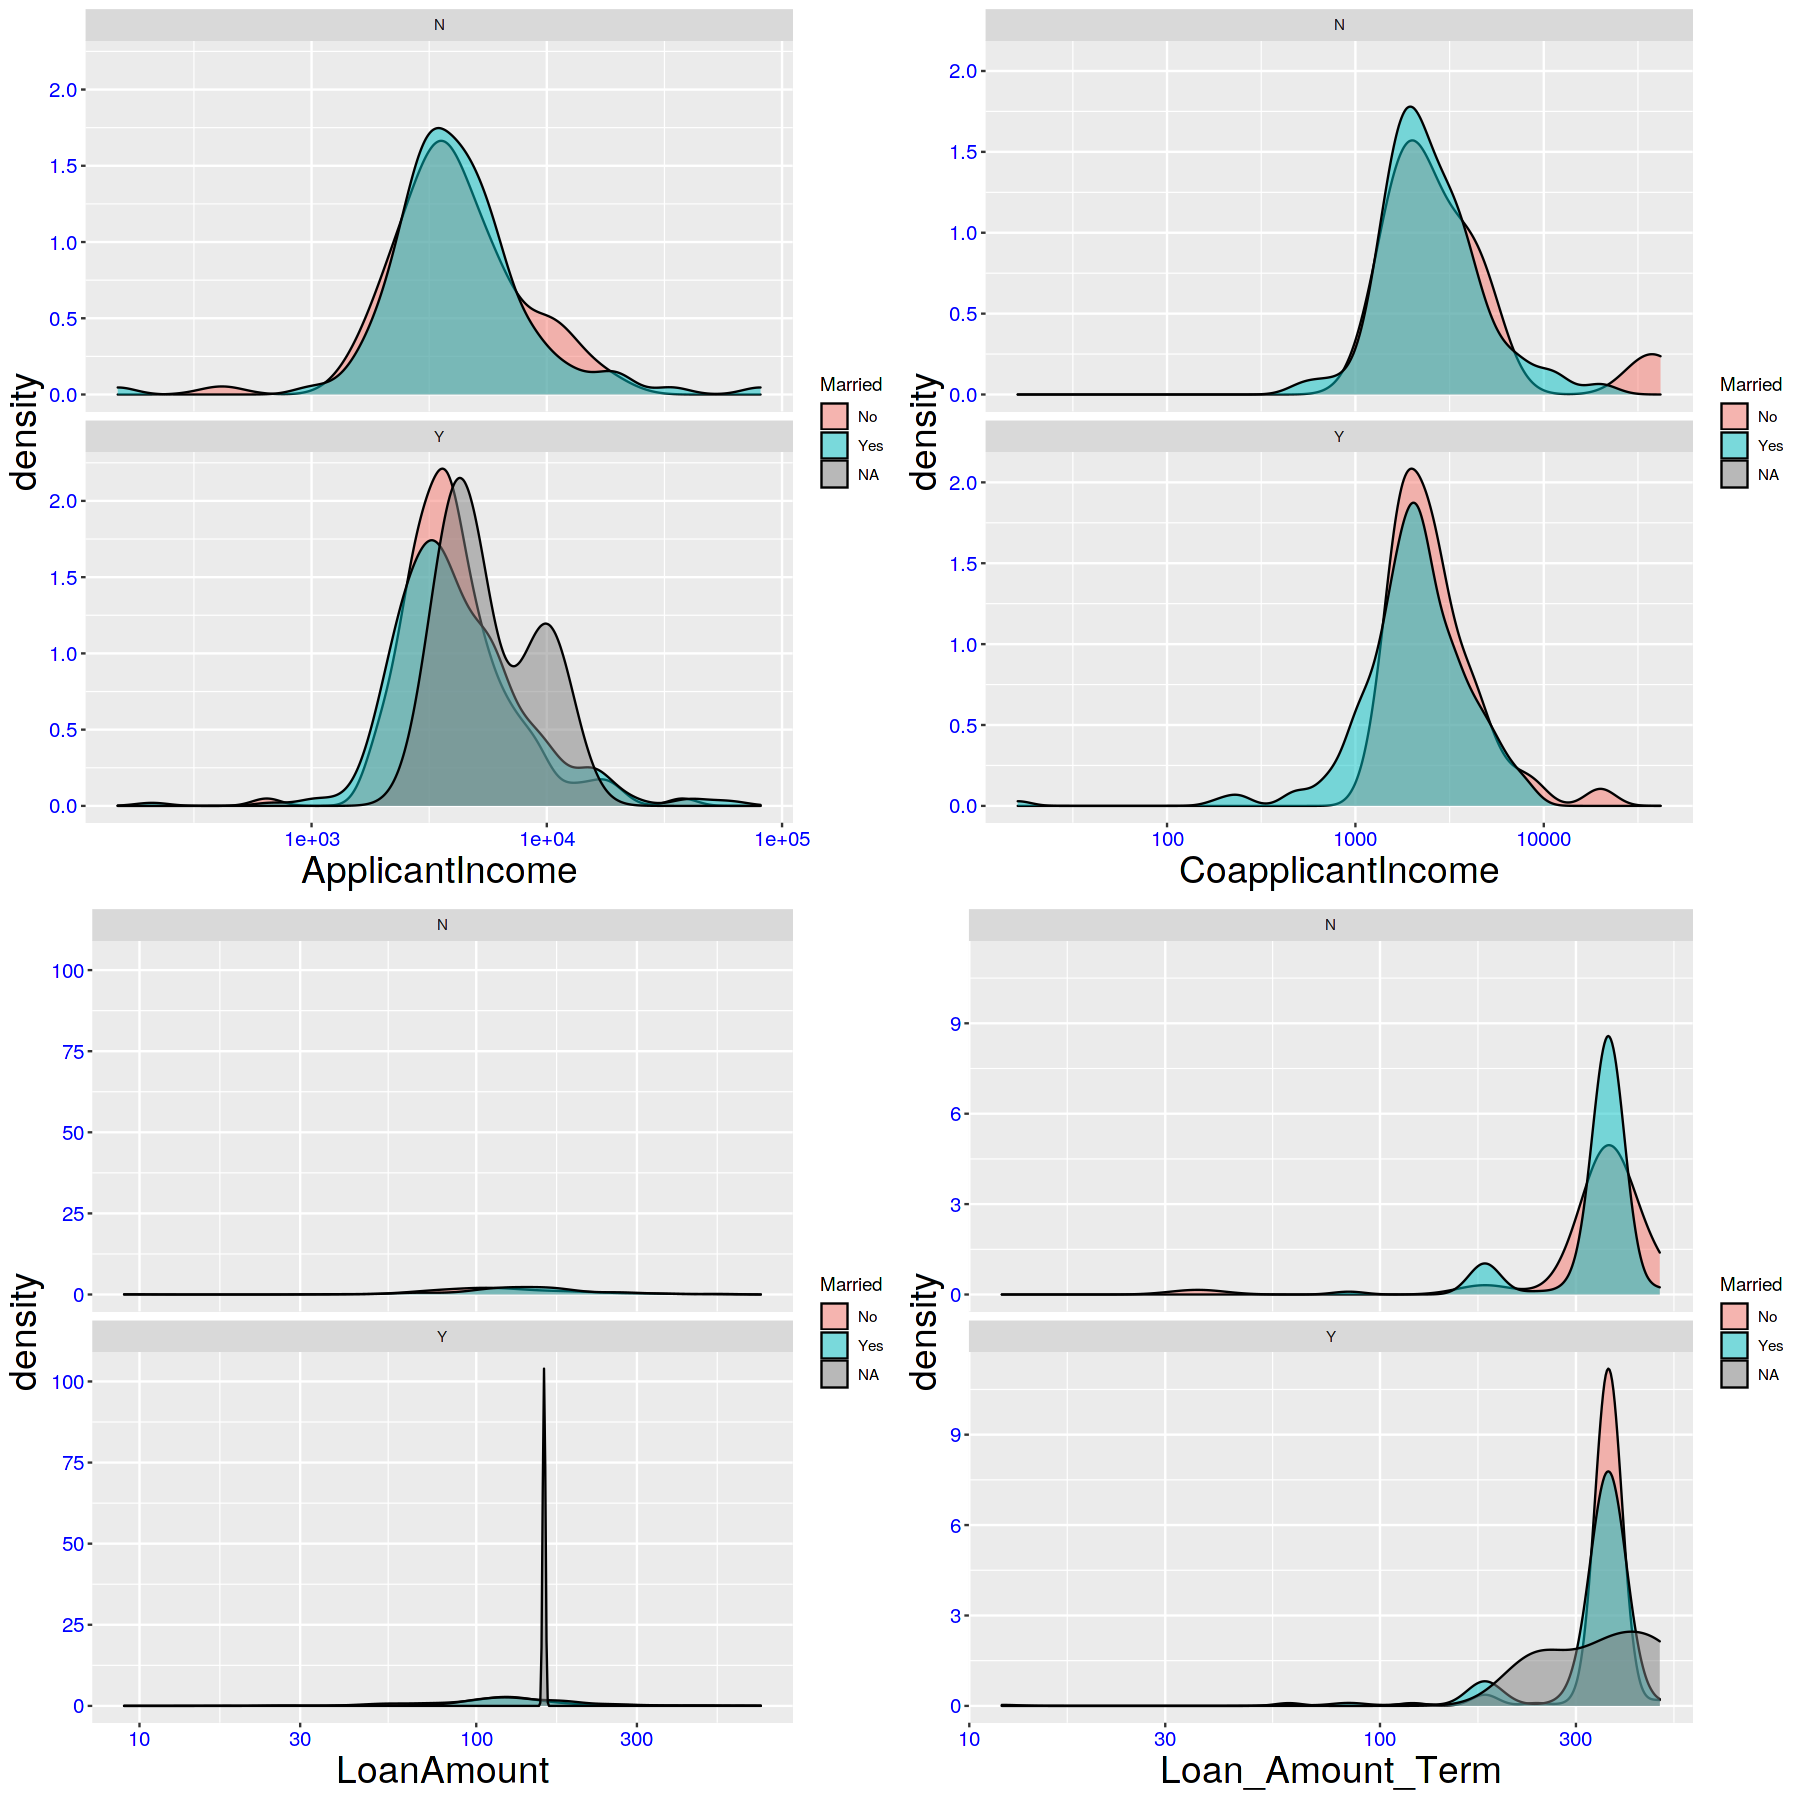

In [19]:
fig(15,15)

plot1 = train_data %>%

  ggplot(aes(ApplicantIncome, fill= Married)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))




plot2 = train_data %>%

  ggplot(aes(CoapplicantIncome, fill= Married)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))




plot3 = train_data %>%

  ggplot(aes(LoanAmount, fill= Married)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))



plot4 = train_data %>%

  ggplot(aes(Loan_Amount_Term, fill= Married)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

layout <- matrix(c(1,2,3,4),2,2,byrow=TRUE)
multiplot(plot1, plot2, plot3, plot4, layout=layout)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 273 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”


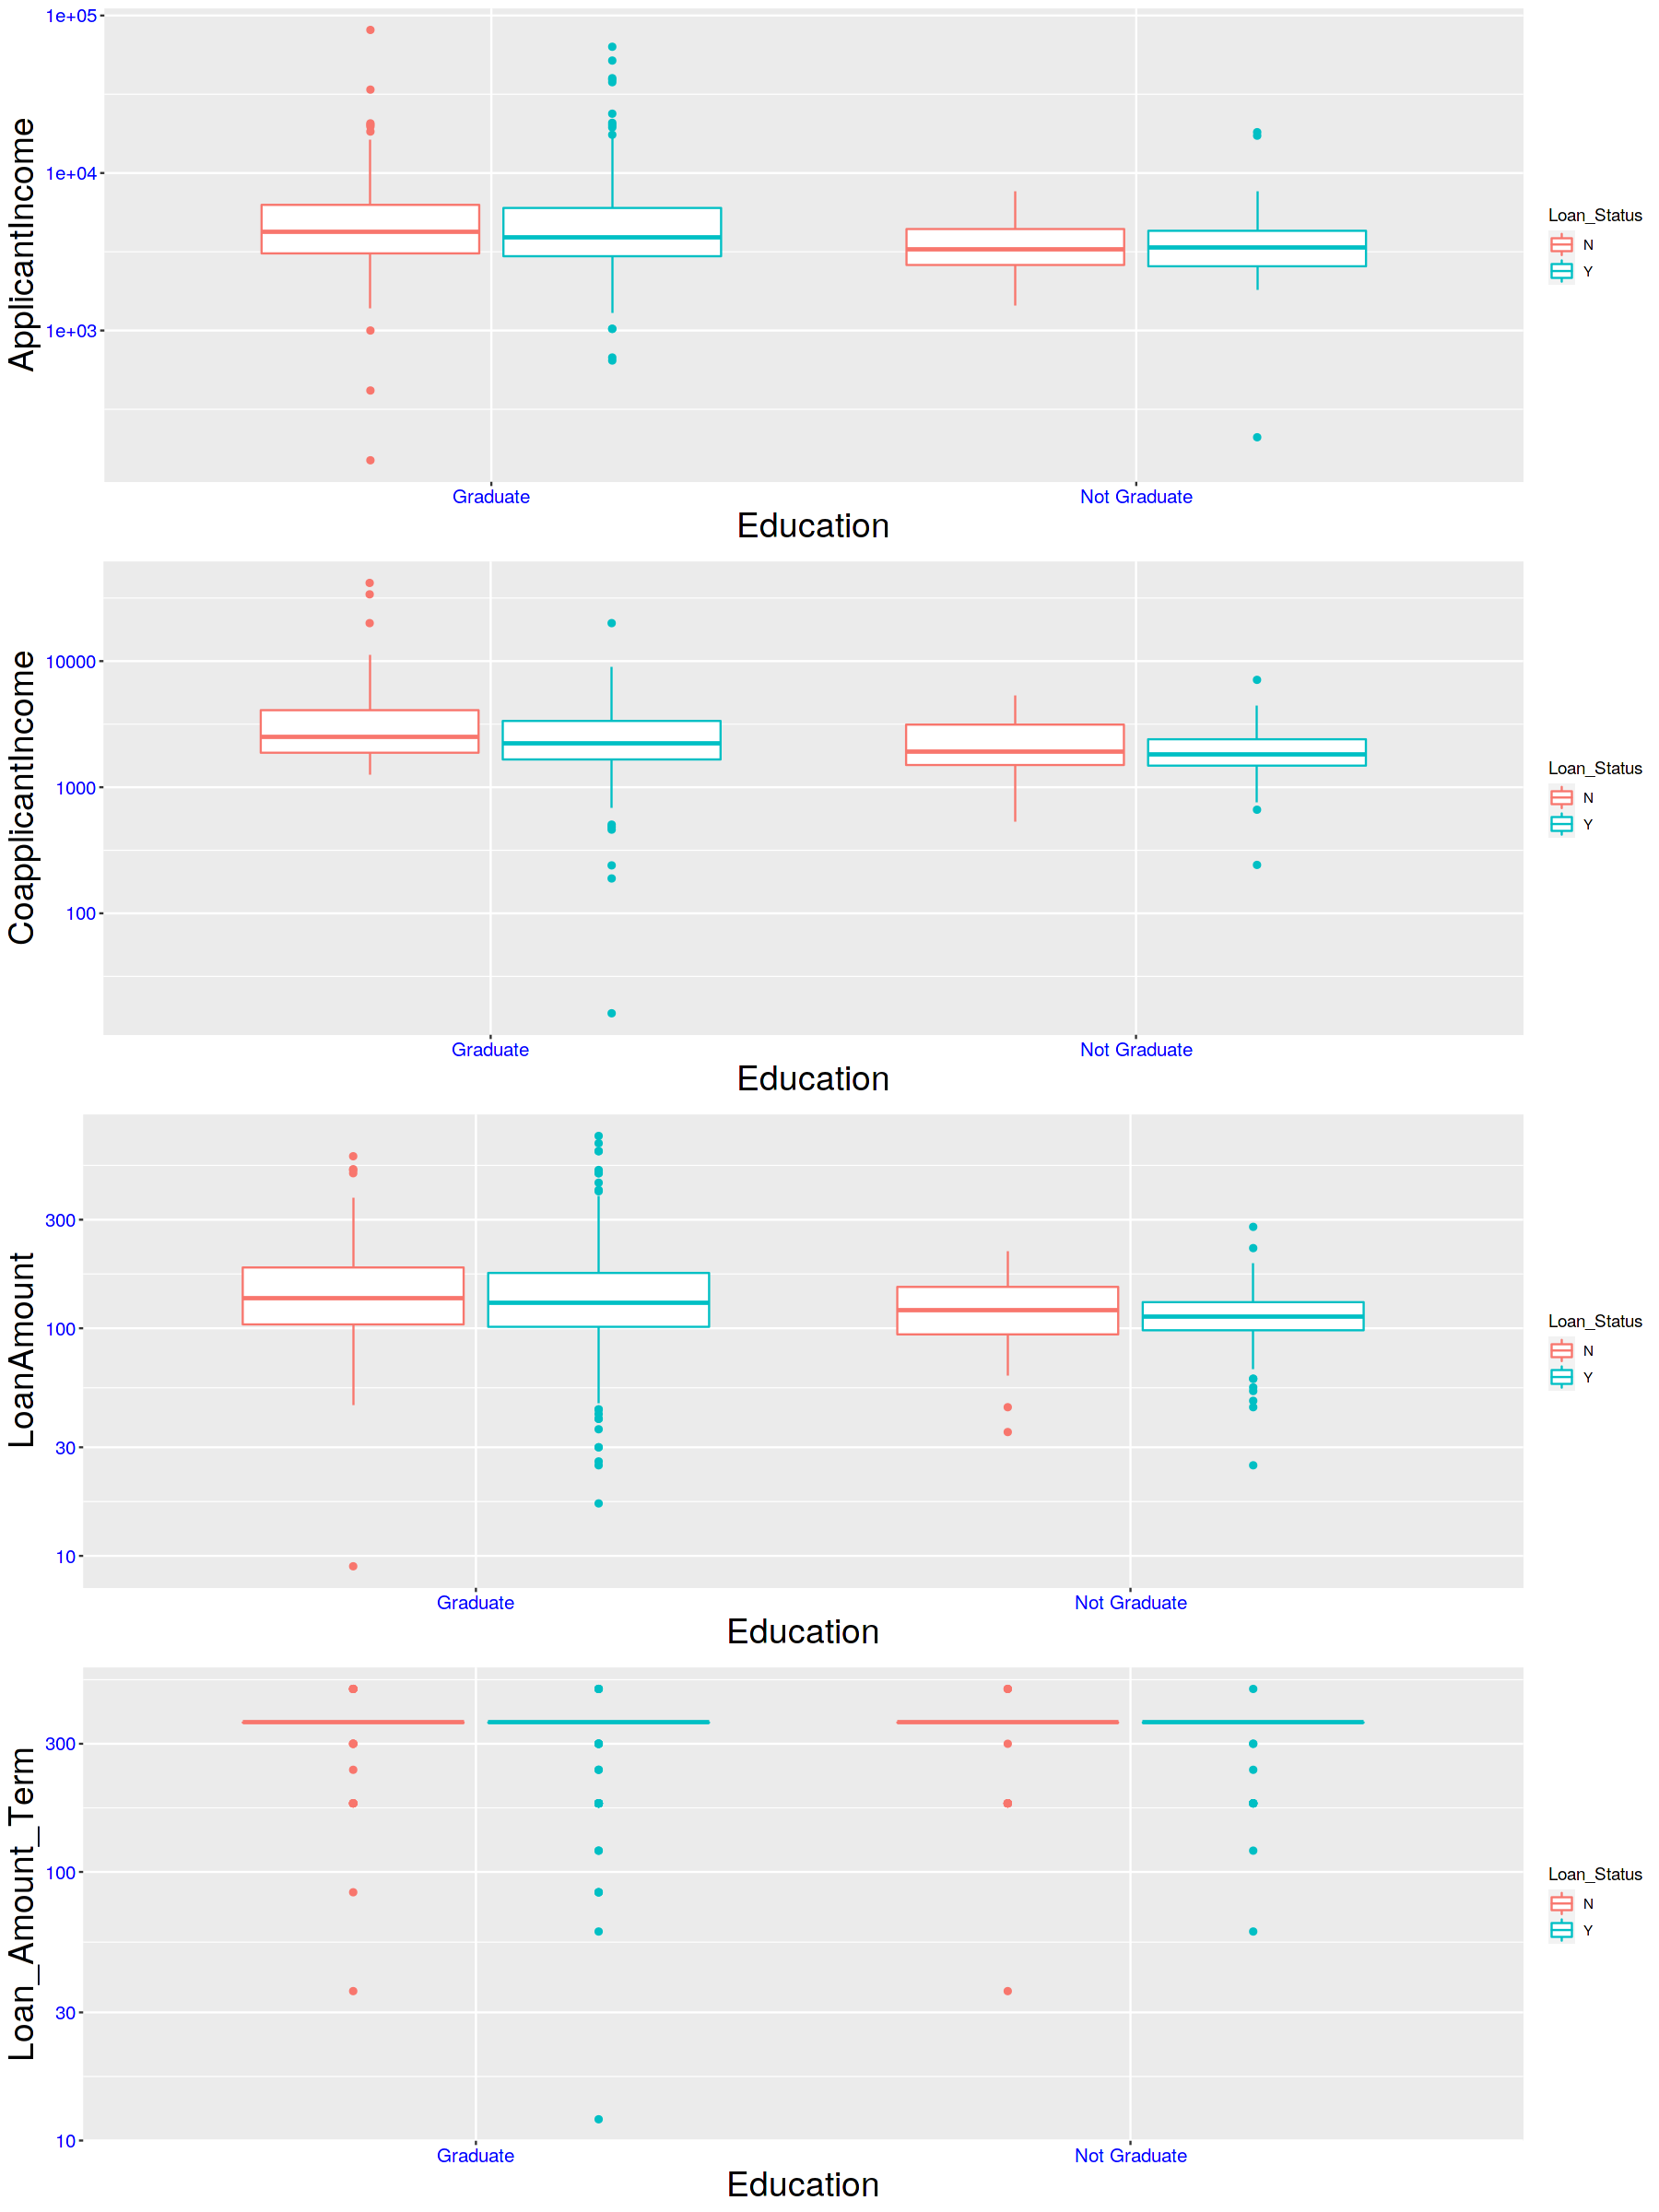

In [20]:
fig(15,20)

plot1 =   ggplot(train_data, aes(Education  , ApplicantIncome , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))


plot2 =   ggplot(train_data, aes(Education  , CoapplicantIncome , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

plot3 =   ggplot(train_data, aes(Education  , LoanAmount , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

plot4 =   ggplot(train_data, aes(Education  , Loan_Amount_Term , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

layout <- matrix(c(1,1,1,2,2,2,3,3,3,4,4,4),4,3,byrow=TRUE)
multiplot(plot1, plot2, plot3, plot4, layout=layout)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 273 rows containing non-finite values (stat_density).”
Warning message:
“Removed 22 rows containing non-finite values (stat_density).”
Warning message:
“Removed 14 rows containing non-finite values (stat_density).”


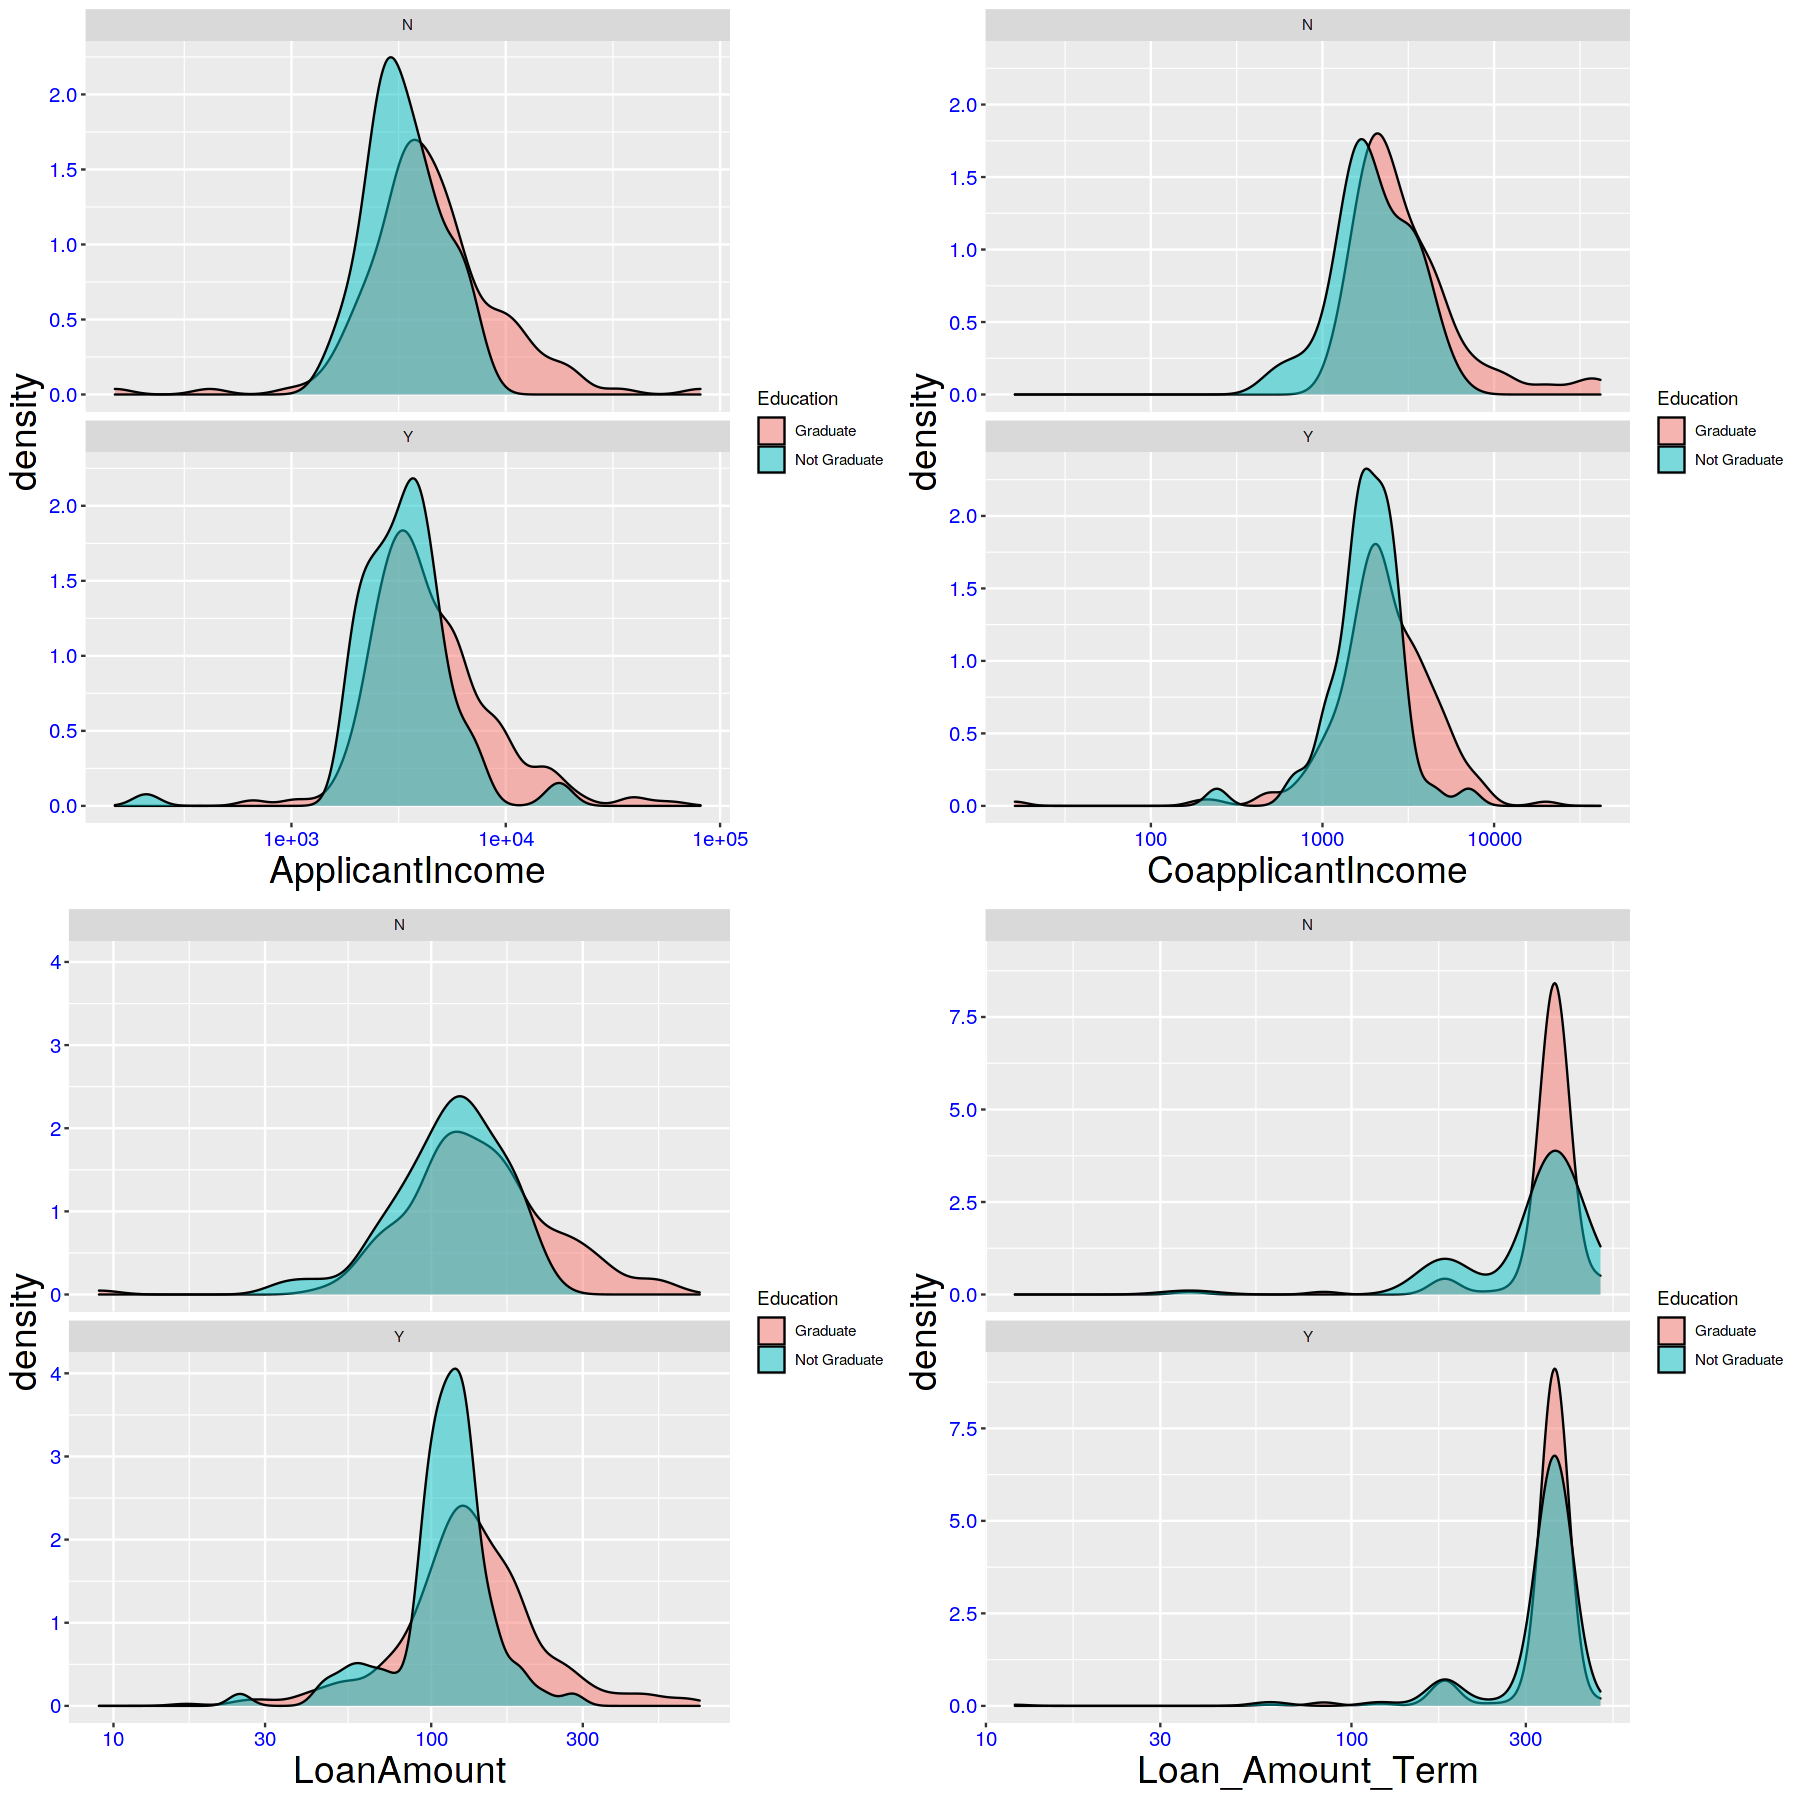

In [21]:
fig(15,15)

plot1 = train_data %>%

  ggplot(aes(ApplicantIncome, fill= Education)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))




plot2 = train_data %>%

  ggplot(aes(CoapplicantIncome, fill= Education)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))




plot3 = train_data %>%

  ggplot(aes(LoanAmount, fill= Education)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))



plot4 = train_data %>%

  ggplot(aes(Loan_Amount_Term, fill= Education)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

layout <- matrix(c(1,2,3,4),2,2,byrow=TRUE)
multiplot(plot1, plot2, plot3, plot4, layout=layout)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 273 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”


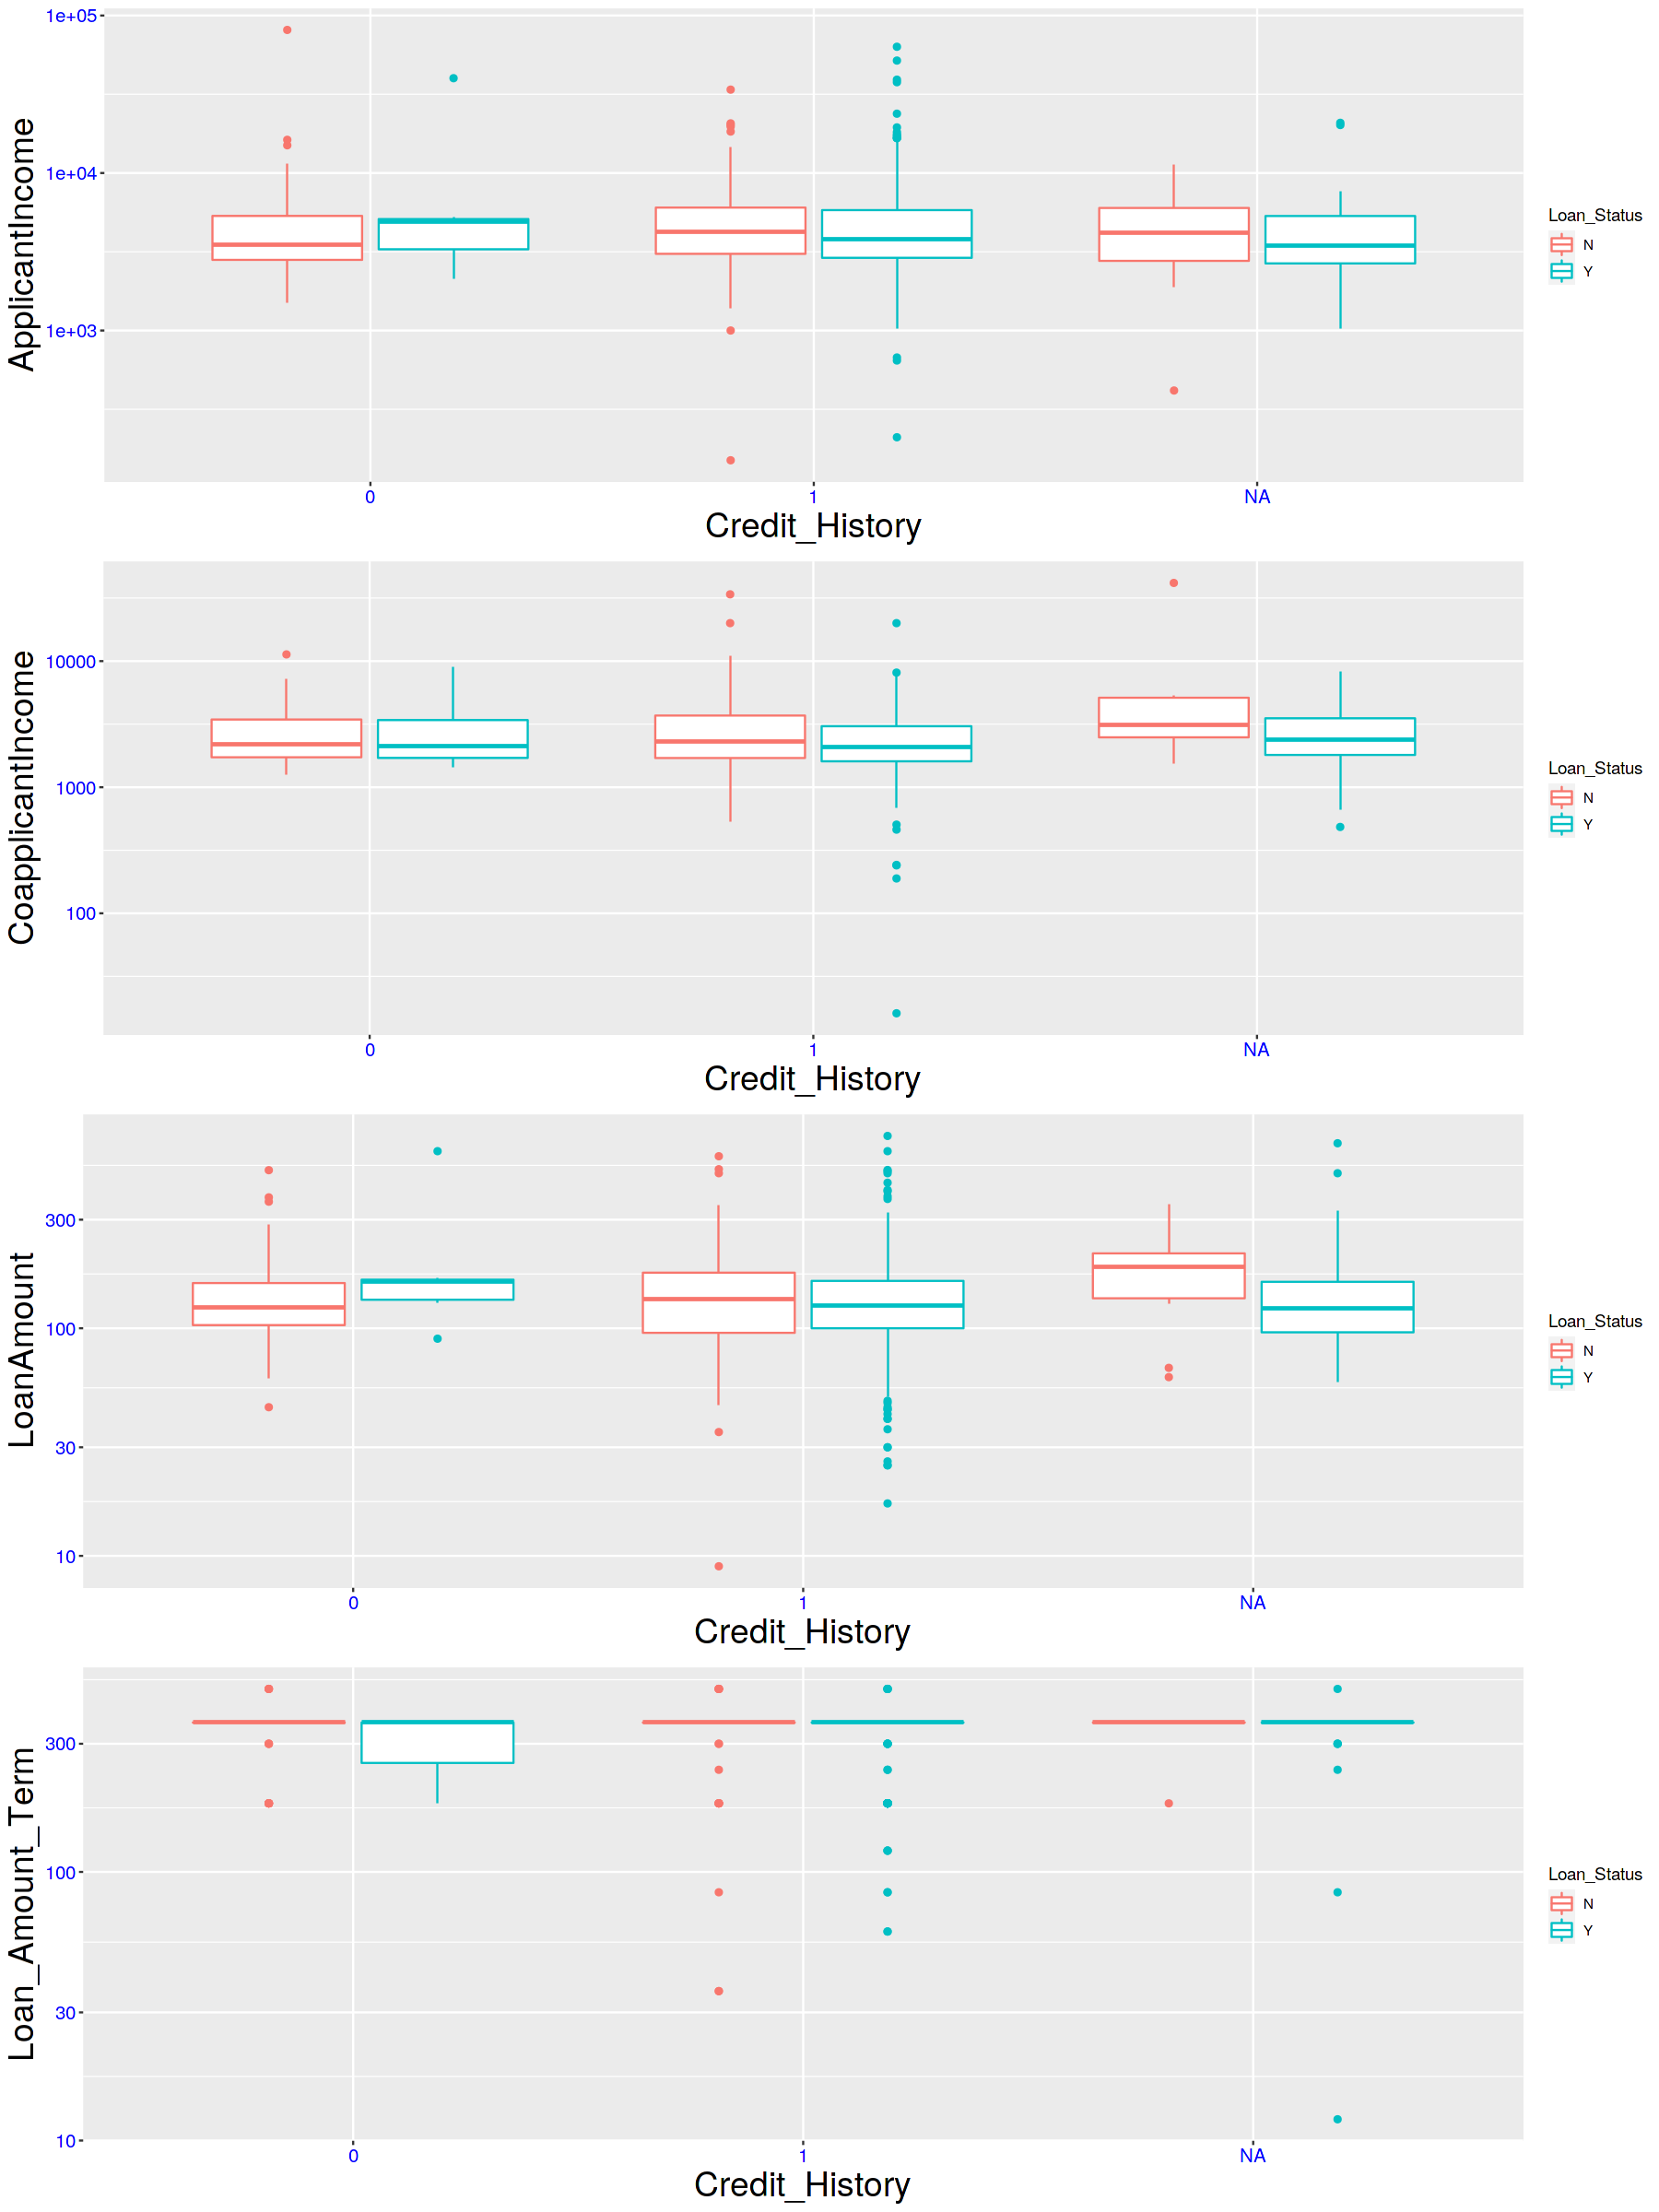

In [22]:
fig(15,20)

plot1 =   ggplot(train_data, aes(Credit_History  , ApplicantIncome , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))


plot2 =   ggplot(train_data, aes(Credit_History  , CoapplicantIncome , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

plot3 =   ggplot(train_data, aes(Credit_History , LoanAmount , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

plot4 =   ggplot(train_data, aes(Credit_History  , Loan_Amount_Term , colour = Loan_Status)) +

  geom_boxplot() +

  scale_y_log10() +
 
  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

layout <- matrix(c(1,1,1,2,2,2,3,3,3,4,4,4),4,3,byrow=TRUE)
multiplot(plot1, plot2, plot3, plot4, layout=layout)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 273 rows containing non-finite values (stat_density).”
Warning message:
“Removed 22 rows containing non-finite values (stat_density).”
Warning message:
“Removed 14 rows containing non-finite values (stat_density).”


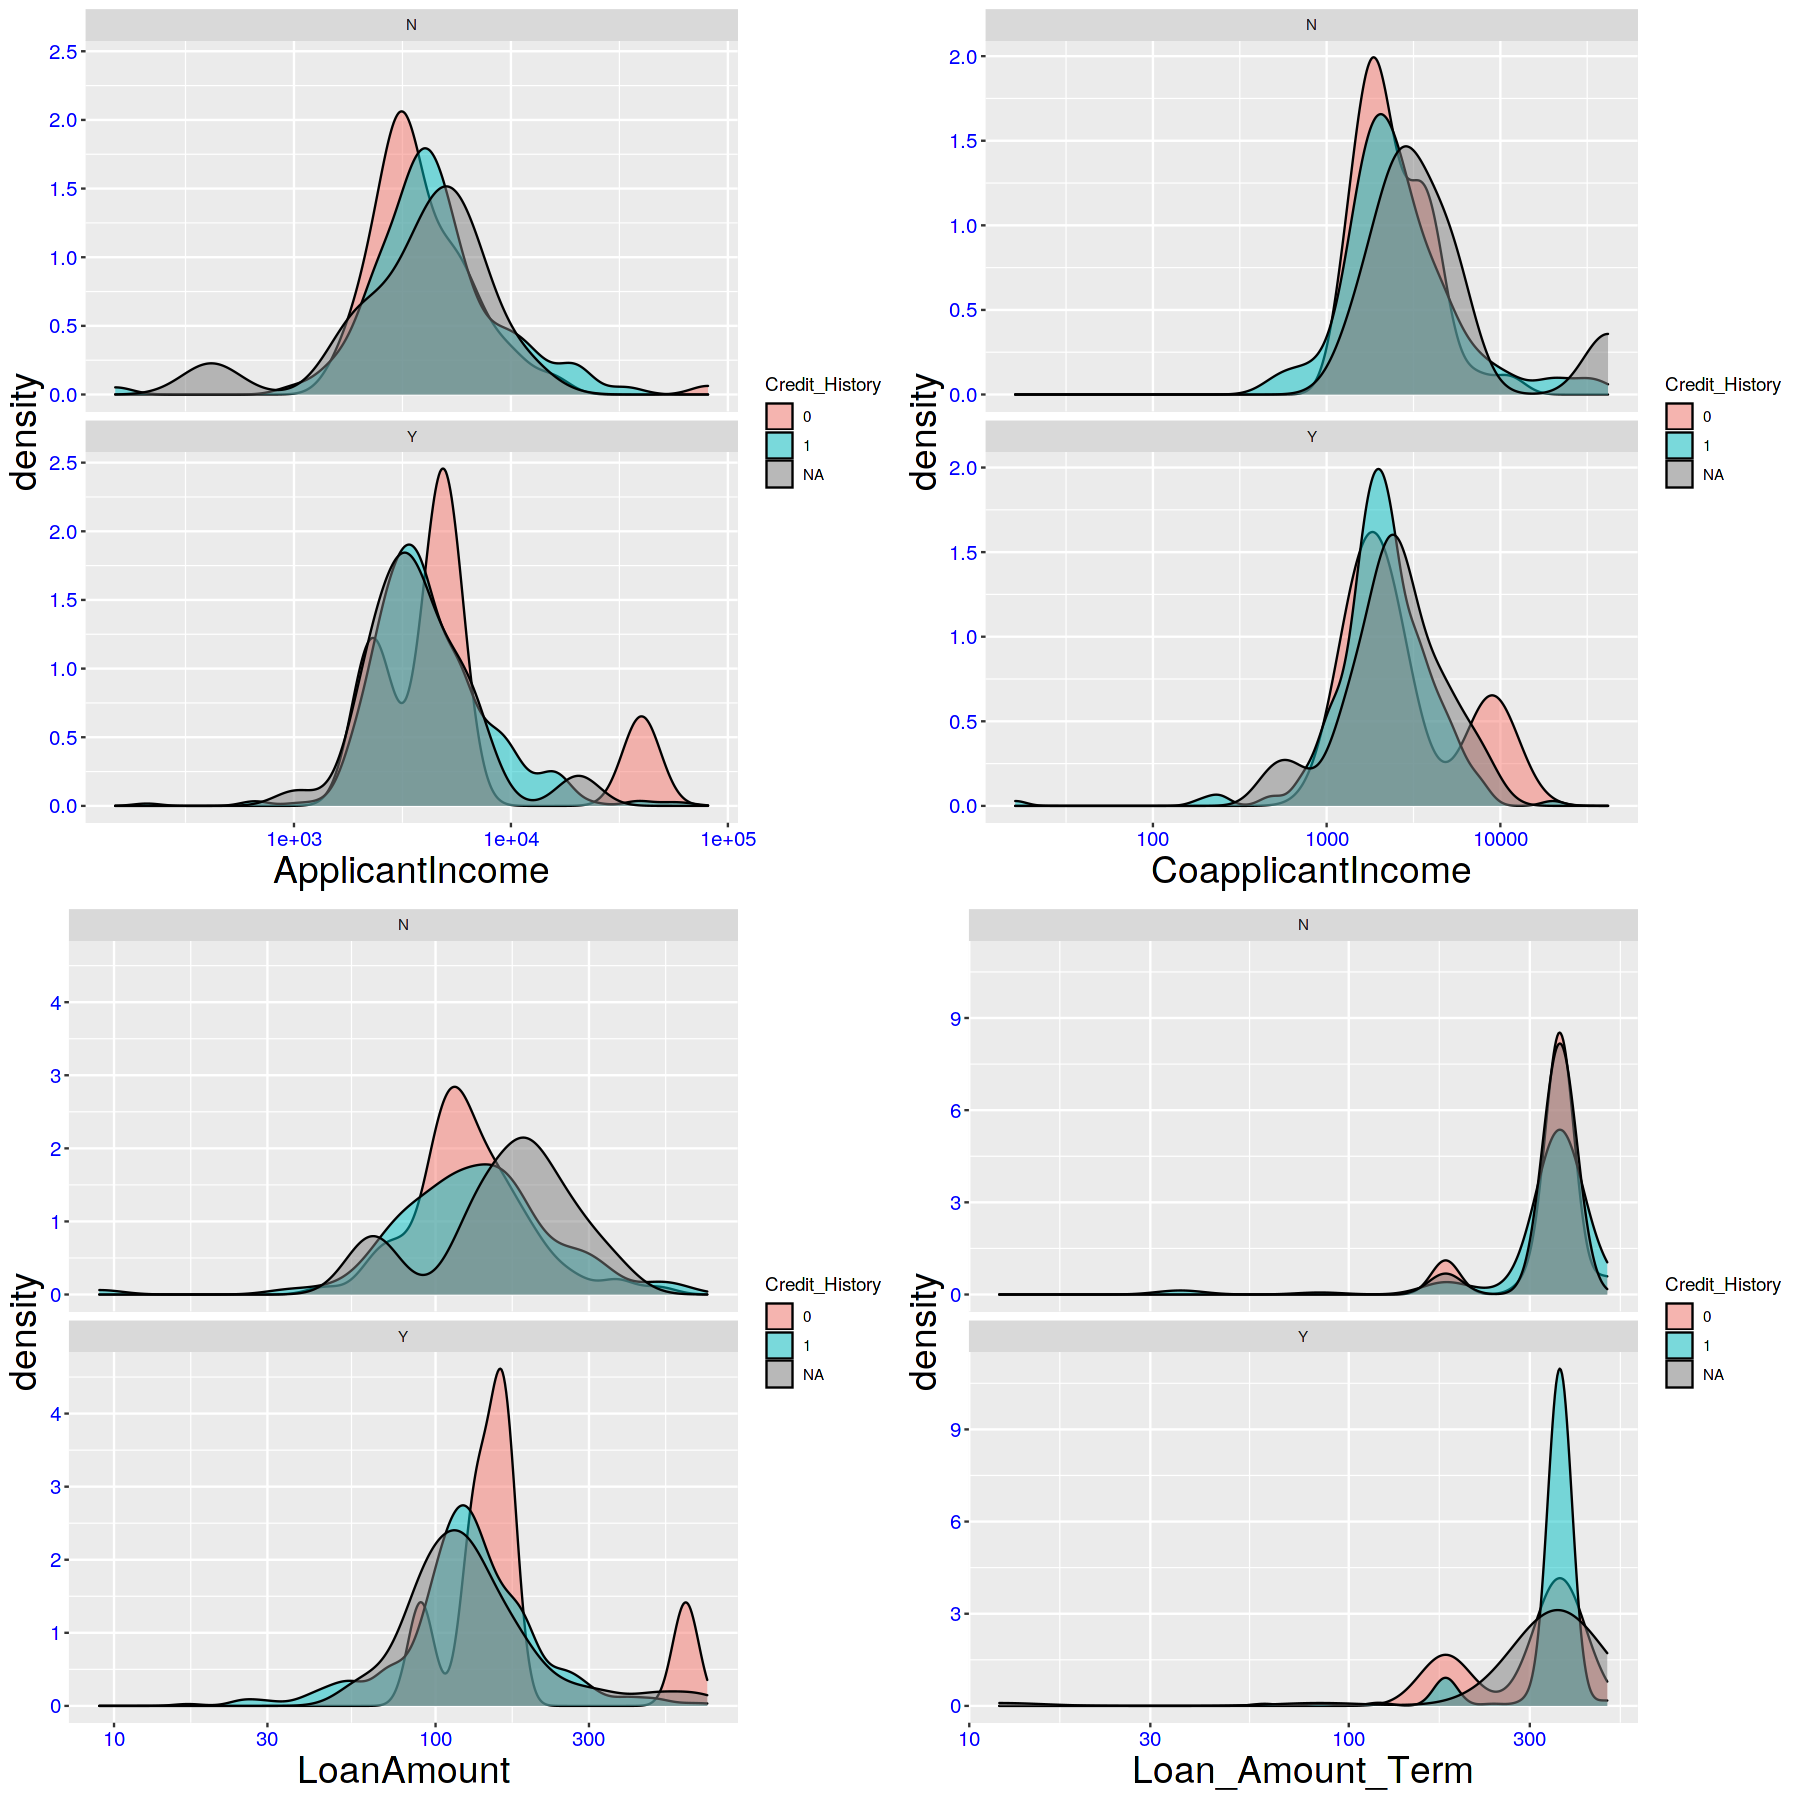

In [23]:
fig(15,15)

plot1 = train_data %>%

  ggplot(aes(ApplicantIncome, fill= Credit_History)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))




plot2 = train_data %>%

  ggplot(aes(CoapplicantIncome, fill= Credit_History)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))




plot3 = train_data %>%

  ggplot(aes(LoanAmount, fill= Credit_History)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))



plot4 = train_data %>%

  ggplot(aes(Loan_Amount_Term, fill= Credit_History)) +

  geom_density(alpha = 0.5) +

  scale_x_log10() +

  facet_wrap(~ Loan_Status, ncol = 1) +

  theme(axis.text = element_text(colour = "blue",size=12),axis.title = element_text(size = rel(2)))

layout <- matrix(c(1,2,3,4),2,2,byrow=TRUE)
multiplot(plot1, plot2, plot3, plot4, layout=layout)

### Chi-Square test for Independence

H0 - Variables are independent
Ha - Variables are dependent

For 5% significance level and 1 degrees of freedon Chi-square value is 3.841
For 5% significance level and 2 degrees of freedon Chi-square value is 5.991

In [24]:
# Gender Vs Loan_Status
(table1 <- table(train_data$Gender,train_data$Loan_Status))

        
           N   Y
  Female  37  75
  Male   150 339

In [25]:
(ct <- chisq.test(table1))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table1
X-squared = 0.13963, df = 1, p-value = 0.7087


Observation:

Since Chi-Square value  < 3.841 or p-value > .05, we fail to reject the null hypothesis, ie we cant confirm a dependency between Gender and Loan_Status

In [26]:
# Credit_History Vs Loan_Status
(table2 <- table(train_data$Credit_History,train_data$Loan_Status))

   
      N   Y
  0  82   7
  1  97 378

In [27]:
(ct <- chisq.test(table2))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table2
X-squared = 174.64, df = 1, p-value < 2.2e-16


Observation:

Since Chi-Square value > 3.841 or p-value < .05, we  reject the null hypothesis, ie there is a dependency between Credit_History and Loan_Status

In [28]:
# Married Vs Loan_Status
(table3 <- table(train_data$Married,train_data$Loan_Status))

     
        N   Y
  No   79 134
  Yes 113 285

In [29]:
(ct <- chisq.test(table3))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table3
X-squared = 4.475, df = 1, p-value = 0.03439


Observation:

Since Chi-Square value > 3.841 or p-value < .05, we reject the null hypothesis, ie there is a dependency between Married and Loan_Status

In [30]:
# Education Vs Loan_Status
(table4 <- table(train_data$Education,train_data$Loan_Status))

              
                 N   Y
  Graduate     140 340
  Not Graduate  52  82

In [31]:
(ct <- chisq.test(table4))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table4
X-squared = 4.0915, df = 1, p-value = 0.0431


Observation:

Since Chi-Square value > 3.841 or p-value < .05, we reject the null hypothesis, ie there is a dependency between Education and Loan_Status

In [32]:
# Self_Employed Vs Loan_Status
(table5 <- table(train_data$Self_Employed,train_data$Loan_Status))

     
        N   Y
  No  157 343
  Yes  26  56

In [33]:
(ct <- chisq.test(table5))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table5
X-squared = 1.0355e-29, df = 1, p-value = 1


Observation:

Since Chi-Square value < 3.841 or p-value > .05, we fail to reject the null hypothesis, ie we cant confirm a dependency between Self_Employed and Loan_Status

In [34]:
# Property_Area Vs Loan_Status
(table6 <- table(train_data$Property_Area,train_data$Loan_Status))

           
              N   Y
  Rural      69 110
  Semiurban  54 179
  Urban      69 133

In [35]:
(ct <- chisq.test(table6))


	Pearson's Chi-squared test

data:  table6
X-squared = 12.298, df = 2, p-value = 0.002136


Observation:

Since Chi-Square value > 3.841 or p-value < .05, we reject the null hypothesis, ie there is a dependency between Property_Area and Loan_Status